# Capstone Project - The Battle of Neighborhoods¶
### Applied Data Science Capstone (Coursera)

### Table of Contents
- Introduction
- Data
- Methodology
- Analysis
- Results
- Discussion
- Conclusion

## Introduction

Singapore, both an island and a country, is one of the smallest but yet most modern and urbanized city in Southeast Asia. From a developing country lacking natural resources, Singapore transformed into a prosperous country through international trades, tourism and become one of the major financial hubs in Asia. It is a multi-racial and multi-cultural country with close to 30% of the population are non-residents from all around the world.

Hong Kong, once a fishing village, became one of the most developed territory and transformed into a major financial and commercial port sine 1990s. While majority of the population is ethinic Chinese, as being a trading, business and tourism hub, there is a considerable number of expatriates living in Hong Kong which forms close to 9% of total population.

Singapore and Hong Kong are both very diversed and are among the top 10 Global Financial Centres. Both cities shared a number of similarities - economies dominated by service sector, high per capita income, high population density, etc. Being 2 major cities in Asia, Singapore and Hong Kong have always been in comparison in different areas such as economy, living environment, education system. 

With the changes in the economic and political environments, there are increasing number of people in Hong Kong who are planning to relocate to other countries, Singapore being one of the countries on the list. There are a number of factors when deciding on the city/country to relocate to - e.g. economic environment, political stability, education, cost of living, living environment... Living environment is utmost important as a similar neighborhood will make it easier for people to adapt to the changes during the relocation process.


### Problem to be solved and Target Audience

The target audience for this project is the people who are planning to relocate from Hong Kong to Singapore and need to decide which neighborhood to live in. Living environment is one of the important factors that they would need to consider during relocation. With more similarities between the current and future neighborhoods, it makes it easier for the people to adapt to the new environment during the relocation process.

While there have been a wide range of comparisons between Singapore and Hong Kong in different aspects, there are limited resources available when comparing neighborhoods between the 2 cities. This project will focus on comparing the different neighborhoods of Singapore and Hong Kong to explore the similarities and differences among the neighborhoods. By clustering the neighborhoods and analyzing the top venues in each neighborhood and the distance from city centres, we will be able to provide suggested neighborhoods for our target audience, and recommended venues to explore when they relocate there.

At the later part of the project, we will apply the clustering results to provide recommendations for a target customer. Below are their information and preferences:

- A young couple without any children
- Work in banking industry in CBD area
- Do not drive
- Currently staying in Sha Tin in Hong Kong
- Enjoy hanging out in cafes and shopping during their rest days

## Data

In order to compare the neighborhoods in Singapore and Hong Kong, we will need to obtain the below information:
- List of neighborhood for Singapore and Hong Kong
- Coordinates for each of the neighborhoods
- Distance of each neighborhood from city centres 
- Venue data in each neighborhood
- List of MRT stations in Singapore

### Neighborhood data for Singapore and Hong Kong
We will obtain the list of neighborhood for Singapore and Hong Kong by extracting the information from Wikipedia pages:

https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore

https://en.wikipedia.org/wiki/Districts_of_Hong_Kong

We will leverage on BeautifulSoup to scrape the data from Wikipedia and transformed them into pandas dataframes. Data will be cleaned by removing unnecessary columns as we will only require the list of neighborhoods. We will also add a "City" column in the dataframe to identify which city the neighborhoods belong to when we merge the neighborhood data for Singapore and Hong Kong together. 

### Coordinates data for each neighborhood
As there is no coordinates data for each neighborhood in the dataframe we created, we will leverage on Nominatim geocoding API to obtain the latitudes and longitudes of each neighborhood. Latitudes and longitudes of each neighborhood will then be added to our neighborhood dataframe.

### Distance of neighborhoods from city centres
Besides venues information, we would also like to take into consideration of the distance of neighborhoods from city centres when we segment the neighborhoods. We will first obtain the coordinates of the city centre of Singapore and Hong Kong from the below websites:  

https://en.wikipedia.org/wiki/Central_Area,_Singapore

https://en.wikipedia.org/wiki/Central,_Hong_Kong

We will then make use of the haversine formula to calculate the distance between each neighborhoods and their respective city centre and add the data for clustering.

### Venue/Location data from Foursquare
We will leverage on Foursquare API to obtain the list of venues and their location data in each neighborhood. We will limit to 100 results within 500m radius from the latitudes and longitudes of each neighborhood for our venue results. After we have a list of venues for each neighborhood, we will then group similar venue categories together to analyze top venue categories in the neighborhoods and to segment the neighborhood by their similarity.

In the recommendation part of this project, we will also leverage on Foursquare to explore and obtain the list of venues and the venue information such as user reviews for our suggested neighborhood to our target audience. 

### List MRT Stations in Singapore
As our target customers will not be driving in Singapore, accessibility to MRT Network (railway) will be particularly important. Access to MRT Network will allow them to commute to work in city centre or travel around Singapore easily. We are able to obtain the list of MRT Stations in Singapore in the below Singapore government website: 

https://data.gov.sg/dataset/train-station-chinese-names

We will first import all the libraries that we need:

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from numpy import cos, sin, arcsin, sqrt
from math import radians

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
from folium.map import Icon
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
import urllib.request

### Retrieve and clean neighborhood data for Singapore
We will scrape the Singapore neighborhood information from Wikipedia page using BeautifulSoup and transform it into pandas dataframe.

In [3]:
url = 'https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore'

In [4]:
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

In [5]:
# import the BeautifulSoup library
from bs4 import BeautifulSoup

In [6]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Planning Areas of Singapore - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"2e92898e-7010-4dd7-b6e9-6b50b1579624","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Planning_Areas_of_Singapore","wgTitle":"Planning Areas of Singapore","wgCurRevisionId":972441300,"wgRevisionId":972441300,"wgArticleId":2224605,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using deprecated image syntax","Urban planning in Singapore","Subdivisions of Singapore"],"wgPageConten

In [8]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable

all_tables=soup.find_all("table")

all_tables

[<table class="infobox vevent" style="width:22em;float: right; width: 250px; font-size: 90%; text-align: left; border-spacing: 3px;"><tbody><tr><th class="summary" colspan="2" style="text-align:center;font-size:125%;font-weight:bold;font-size: 130%; background-color: #F0F0F0; vertical-align: middle">Planning Areas of Singapore</th></tr><tr><td colspan="2" style="text-align:center"><a class="image" href="/wiki/File:Singapore_MP2008._Urban_Planning_Areas.svg"><img alt="Singapore MP2008. Urban Planning Areas.svg" data-file-height="452" data-file-width="710" decoding="async" height="191" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/300px-Singapore_MP2008._Urban_Planning_Areas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/450px-Singapore_MP2008._Urban_Planning_Areas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.sv

In [9]:
right_table=soup.find('table', class_='wikitable sortable')

right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Name <small>(<a href="/wiki/English_language" title="English language">English</a>)</small>
</th>
<th><a href="/wiki/Malay_language" title="Malay language">Malay</a>
</th>
<th><a href="/wiki/Chinese_language" title="Chinese language">Chinese</a>
</th>
<th><a href="/wiki/Pinyin" title="Pinyin">Pinyin</a>
</th>
<th><a href="/wiki/Tamil_language" title="Tamil language">Tamil</a>
</th>
<th>Region
</th>
<th>Area (km2)
</th>
<th>Population<sup class="reference" id="cite_ref-7"><a href="#cite_note-7">[7]</a></sup>
</th>
<th>Density (/km2)
</th></tr>
<tr>
<td><a href="/wiki/Ang_Mo_Kio" title="Ang Mo Kio">Ang Mo Kio</a>
</td>
<td>
</td>
<td>宏茂桥
</td>
<td>Hóng mào qiáo
</td>
<td>ஆங் மோ கியோ
</td>
<td><a href="/wiki/North-East_Region,_Singapore" title="North-East Region, Singapore">North-East</a>
</td>
<td>13.94
</td>
<td>163,950
</td>
<td>13,400
</td></tr>
<tr>
<td><a href="/wiki/Bedok" title="Bedok">Bedok</a>
</td>
<td>*
</td>
<td>勿洛
</td>
<td>

In [10]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]


for row in right_table.findAll('tr'):

    cells=row.findAll('td')

    if len(cells)==9:

        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        I.append(cells[8].find(text=True))


In [11]:
df=pd.DataFrame(A,columns=['Neighborhood'])

df['Malay']=B

df['Chinese']=C
df['Pinyin']=D
df['Tamil']=E
df['Region']=F
df['Area']=G
df['Population']=H
df['Density']=I
df

Neighborhood                         Malay  Chinese  \
0                Ang Mo Kio                            \n    宏茂桥\n   
1                     Bedok                           *\n     勿洛\n   
2                    Bishan                            \n     碧山\n   
3                  Boon Lay                            \n     文礼\n   
4               Bukit Batok                           *\n   武吉巴督\n   
5               Bukit Merah                           *\n     红山\n   
6             Bukit Panjang                           *\n   武吉班让\n   
7               Bukit Timah                           *\n   武吉知马\n   
8   Central Water Catchment  Kawasan Tadahan Air Tengah\n  中央集水区\n   
9                    Changi                           *\n     樟宜\n   
10               Changi Bay                Teluk Changi\n    樟宜湾\n   
11            Choa Chu Kang                            \n    蔡厝港\n   
12                 Clementi                            \n    金文泰\n   
13            Downtown Core                Pusat Bandar\n    市中心\n   
14                  Geylang                           *\n     芽笼\n   
15                  Hougang                            \n     后港\n   
16              Jurong East                Jurong Timur\n    裕廊东\n   
17              Jurong West                Jurong Barat\n    裕廊西\n   
18                  Kallang                           *\n     加冷\n   
19             Lim Chu Kang                            \n    林厝港\n   
20                   Mandai                            \n     万礼\n   
21              Marina East                Marina Timur\n    滨海东\n   
22             Marina South              Marina Selatan\n    滨海南\n   
23            Marine Parade                            \n   马林百列\n   
24                   Museum                      Muzium\n    博物馆\n   
25                   Newton                            \n     纽顿\n   
26    North-Eastern Islands        Kepulauan Timur Laut\n   东北群岛\n   
27                   Novena                            \n    诺维娜\n   
28                  Orchard                            \n     乌节\n   
29                   Outram                            \n     欧南\n   
30                Pasir Ris                           *\n    巴西立\n   
31               Paya Lebar                           *\n   巴耶利峇\n   
32                  Pioneer                            \n     先驱\n   
33                  Punggol                            \n     榜鹅\n   
34               Queenstown                            \n    女皇镇\n   
35             River Valley                            \n   里峇峇利\n   
36                   Rochor                            \n     梧槽\n   
37                  Seletar                           *\n    实里达\n   
38                Sembawang                           *\n    三巴旺\n   
39                 Sengkang                            \n     盛港\n   
40                Serangoon                           *\n    实龙岗\n   
41                  Simpang                           *\n     新邦\n   
42          Singapore River            Sungai Singapura\n   新加坡河\n   
43         Southern Islands           Kepulauan Selatan\n   南部群岛\n   
44             Straits View           Pemandangan Selat\n    海峡景\n   
45             Sungei Kadut                Sungai Kadut\n   双溪加株\n   
46                 Tampines                           *\n    淡滨尼\n   
47                  Tanglin                            \n     东陵\n   
48                   Tengah                           *\n     登加\n   
49                Toa Payoh                            \n    大巴窑\n   
50                     Tuas                            \n     大士\n   
51          Western Islands             Kepulauan Barat\n   西部群岛\n   
52  Western Water Catchment   Kawasan Tadahan Air Barat\n  西部集水区\n   
53                Woodlands                            \n     兀兰\n   
54                   Yishun                            \n     义顺\n   

                    Pinyin                               Tamil      Region  \
0          Hóng 

Since we will only need the list of neighborhoods, we will clean the data by removing the unnecessary columns. As we will be combining the neighborhood data with that for Hong Kong, we will also add a new column "City" to our dataframe for easy identification. We will now have a dataframe with Singapore's neighborhoods and city.

In [12]:
df_singapore=df.drop(['Malay', 'Chinese','Pinyin', 'Tamil', 'Area','Population', 'Density','Region'],axis=1).reset_index(drop=True)
df_singapore['City'] = 'Singapore'

In [13]:
df_singapore

Neighborhood       City
0                Ang Mo Kio  Singapore
1                     Bedok  Singapore
2                    Bishan  Singapore
3                  Boon Lay  Singapore
4               Bukit Batok  Singapore
5               Bukit Merah  Singapore
6             Bukit Panjang  Singapore
7               Bukit Timah  Singapore
8   Central Water Catchment  Singapore
9                    Changi  Singapore
10               Changi Bay  Singapore
11            Choa Chu Kang  Singapore
12                 Clementi  Singapore
13            Downtown Core  Singapore
14                  Geylang  Singapore
15                  Hougang  Singapore
16              Jurong East  Singapore
17              Jurong West  Singapore
18                  Kallang  Singapore
19             Lim Chu Kang  Singapore
20                   Mandai  Singapore
21              Marina East  Singapore
22             Marina South  Singapore
23            Marine Parade  Singapore
24                   Museum  Singapore
25                   Newton  Singapore
26    North-Eastern Islands  Singapore
27                   Novena  Singapore
28                  Orchard  Singapore
29                   Outram  Singapore
30                Pasir Ris  Singapore
31               Paya Lebar  Singapore
32                  Pioneer  Singapore
33                  Punggol  Singapore
34               Queenstown  Singapore
35             River Valley  Singapore
36                   Rochor  Singapore
37                  Seletar  Singapore
38                Sembawang  Singapore
39                 Sengkang  Singapore
40                Serangoon  Singapore
41                  Simpang  Singapore
42          Singapore River  Singapore
43         Southern Islands  Singapore
44             Straits View  Singapore
45             Sungei Kadut  Singapore
46                 Tampines  Singapore
47                  Tanglin  Singapore
48                   Tengah  Singapore
49                Toa Payoh  Singapore
50                     Tuas  Singapore
51          Western Islands  Singapore
52  Western Water Catchment  Singapore
53                Woodlands  Singapore
54                   Yishun  Singapore

To obtain the coordinates for the neighborhood, we will use Nominatim geocoding API to locate the latitudes and longitudes for each neighborhood and add them to our dataframe.

In [14]:
neighborhoods = df_singapore['Neighborhood']
hood_number = 0
for hood in neighborhoods:
    geolocator = Nominatim(user_agent='karenleeyt_project')
    location = geolocator.geocode('{} Singapore'.format(hood))

    df_singapore.loc[hood_number,'Latitude'] = location[1][0]
    df_singapore.loc[hood_number,'Longitude'] = location[1][1]
    hood_number = hood_number + 1

latitude = location.latitude
longitude = location.longitude
df_singapore

Neighborhood       City  Latitude   Longitude
0                Ang Mo Kio  Singapore  1.370080  103.849523
1                     Bedok  Singapore  1.323976  103.930216
2                    Bishan  Singapore  1.350986  103.848255
3                  Boon Lay  Singapore  1.338550  103.705812
4               Bukit Batok  Singapore  1.349057  103.749591
5               Bukit Merah  Singapore  1.270439  103.828318
6             Bukit Panjang  Singapore  1.379149  103.761413
7               Bukit Timah  Singapore  1.354690  103.776372
8   Central Water Catchment  Singapore  1.375708  103.801743
9                    Changi  Singapore  1.351080  103.990064
10               Changi Bay  Singapore  1.316850  104.020649
11            Choa Chu Kang  Singapore  1.384749  103.744534
12                 Clementi  Singapore  1.315100  103.765231
13            Downtown Core  Singapore  1.287475  103.856033
14                  Geylang  Singapore  1.318186  103.887056
15                  Hougang  Singapore  1.370801  103.892544
16              Jurong East  Singapore  1.333108  103.742294
17              Jurong West  Singapore  1.339636  103.707339
18                  Kallang  Singapore  1.310759  103.866262
19             Lim Chu Kang  Singapore  1.434217  103.714987
20                   Mandai  Singapore  1.423535  103.803350
21              Marina East  Singapore  1.288624  103.869827
22             Marina South  Singapore  1.276998  103.861500
23            Marine Parade  Singapore  1.302689  103.907395
24                   Museum  Singapore  1.296052  103.847599
25                   Newton  Singapore  1.313183  103.838040
26    North-Eastern Islands  Singapore  1.382882  104.050726
27                   Novena  Singapore  1.320526  103.843881
28                  Orchard  Singapore  1.303427  103.831342
29                   Outram  Singapore  1.282870  103.837860
30                Pasir Ris  Singapore  1.373031  103.949255
31               Paya Lebar  Singapore  1.317480  103.892353
32                  Pioneer  Singapore  1.337588  103.697410
33                  Punggol  Singapore  1.405197  103.902350
34               Queenstown  Singapore  1.294623  103.806037
35             River Valley  Singapore  1.297582  103.836514
36                   Rochor  Singapore  1.303918  103.852789
37                  Seletar  Singapore  1.409849  103.877379
38                Sembawang  Singapore  1.449093  103.820055
39                 Sengkang  Singapore  1.391924  103.895491
40                Serangoon  Singapore  1.349761  103.873684
41                  Simpang  Singapore  1.445295  103.849743
42          Singapore River  Singapore  1.289178  103.845154
43         Southern Islands  Singapore  1.199182  103.760249
44             Straits View  Singapore  1.255708  103.862228
45             Sungei Kadut  Singapore  1.414997  103.753311
46                 Tampines  Singapore  1.354653  103.943571
47                  Tanglin  Singapore  1.306044  103.815280
48                   Tengah  Singapore  1.362453  103.725040
49                Toa Payoh  Singapore  1.335391  103.849741
50                     Tuas  Singapore  1.329372  103.648236
51          Western Islands  Singapore  1.250883  103.687883
52  Western Water Catchment  Singapore  1.366452  103.681031
53                Woodlands  Singapore  1.436897  103.786216
54                   Yishun  Singapore  1.429384  103.835028

In [15]:
df_singapore=df_singapore[['City']+[col for col in df_singapore.columns if col!='City']]
df_singapore

City             Neighborhood  Latitude   Longitude
0   Singapore               Ang Mo Kio  1.370080  103.849523
1   Singapore                    Bedok  1.323976  103.930216
2   Singapore                   Bishan  1.350986  103.848255
3   Singapore                 Boon Lay  1.338550  103.705812
4   Singapore              Bukit Batok  1.349057  103.749591
5   Singapore              Bukit Merah  1.270439  103.828318
6   Singapore            Bukit Panjang  1.379149  103.761413
7   Singapore              Bukit Timah  1.354690  103.776372
8   Singapore  Central Water Catchment  1.375708  103.801743
9   Singapore                   Changi  1.351080  103.990064
10  Singapore               Changi Bay  1.316850  104.020649
11  Singapore            Choa Chu Kang  1.384749  103.744534
12  Singapore                 Clementi  1.315100  103.765231
13  Singapore            Downtown Core  1.287475  103.856033
14  Singapore                  Geylang  1.318186  103.887056
15  Singapore                  Hougang  1.370801  103.892544
16  Singapore              Jurong East  1.333108  103.742294
17  Singapore              Jurong West  1.339636  103.707339
18  Singapore                  Kallang  1.310759  103.866262
19  Singapore             Lim Chu Kang  1.434217  103.714987
20  Singapore                   Mandai  1.423535  103.803350
21  Singapore              Marina East  1.288624  103.869827
22  Singapore             Marina South  1.276998  103.861500
23  Singapore            Marine Parade  1.302689  103.907395
24  Singapore                   Museum  1.296052  103.847599
25  Singapore                   Newton  1.313183  103.838040
26  Singapore    North-Eastern Islands  1.382882  104.050726
27  Singapore                   Novena  1.320526  103.843881
28  Singapore                  Orchard  1.303427  103.831342
29  Singapore                   Outram  1.282870  103.837860
30  Singapore                Pasir Ris  1.373031  103.949255
31  Singapore               Paya Lebar  1.317480  103.892353
32  Singapore                  Pioneer  1.337588  103.697410
33  Singapore                  Punggol  1.405197  103.902350
34  Singapore               Queenstown  1.294623  103.806037
35  Singapore             River Valley  1.297582  103.836514
36  Singapore                   Rochor  1.303918  103.852789
37  Singapore                  Seletar  1.409849  103.877379
38  Singapore                Sembawang  1.449093  103.820055
39  Singapore                 Sengkang  1.391924  103.895491
40  Singapore                Serangoon  1.349761  103.873684
41  Singapore                  Simpang  1.445295  103.849743
42  Singapore          Singapore River  1.289178  103.845154
43  Singapore         Southern Islands  1.199182  103.760249
44  Singapore             Straits View  1.255708  103.862228
45  Singapore             Sungei Kadut  1.414997  103.753311
46  Singapore                 Tampines  1.354653  103.943571
47  Singapore                  Tanglin  1.306044  103.815280
48  Singapore                   Tengah  1.362453  103.725040
49  Singapore                Toa Payoh  1.335391  103.849741
50  Singapore                     Tuas  1.329372  103.648236
51  Singapore          Western Islands  1.250883  103.687883
52  Singapore  Western Water Catchment  1.366452  103.681031
53  Singapore                Woodlands  1.436897  103.786216
54  Singapore                   Yishun  1.429384  103.835028

The coordinates for city centre of Singapore is 1.291667 (latitude), 103.85 (logitude). We will make use of haversine to calculate the distance between each of the Singapore neighborhood and city centre and add that to our dataframe.

In [16]:
def haversine(row):
    lon1 = 103.85
    lat1 = 1.291667
    lon2 = row['Longitude']
    lat2 = row['Latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

df_singapore['Distance from city centre'] = df_singapore.apply(lambda row: haversine(row), axis=1)
df_singapore

<ipython-input-16-51b4ba8efb99>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singapore['Distance from city centre'] = df_singapore.apply(lambda row: haversine(row), axis=1)


City             Neighborhood  Latitude   Longitude  \
0   Singapore               Ang Mo Kio  1.370080  103.849523   
1   Singapore                    Bedok  1.323976  103.930216   
2   Singapore                   Bishan  1.350986  103.848255   
3   Singapore                 Boon Lay  1.338550  103.705812   
4   Singapore              Bukit Batok  1.349057  103.749591   
5   Singapore              Bukit Merah  1.270439  103.828318   
6   Singapore            Bukit Panjang  1.379149  103.761413   
7   Singapore              Bukit Timah  1.354690  103.776372   
8   Singapore  Central Water Catchment  1.375708  103.801743   
9   Singapore                   Changi  1.351080  103.990064   
10  Singapore               Changi Bay  1.316850  104.020649   
11  Singapore            Choa Chu Kang  1.384749  103.744534   
12  Singapore                 Clementi  1.315100  103.765231   
13  Singapore            Downtown Core  1.287475  103.856033   
14  Singapore                  Geylang  1.318186  103.887056   
15  Singapore                  Hougang  1.370801  103.892544   
16  Singapore              Jurong East  1.333108  103.742294   
17  Singapore              Jurong West  1.339636  103.707339   
18  Singapore                  Kallang  1.310759  103.866262   
19  Singapore             Lim Chu Kang  1.434217  103.714987   
20  Singapore                   Mandai  1.423535  103.803350   
21  Singapore              Marina East  1.288624  103.869827   
22  Singapore             Marina South  1.276998  103.861500   
23  Singapore            Marine Parade  1.302689  103.907395   
24  Singapore                   Museum  1.296052  103.847599   
25  Singapore                   Newton  1.313183  103.838040   
26  Singapore    North-Eastern Islands  1.382882  104.050726   
27  Singapore                   Novena  1.320526  103.843881   
28  Singapore                  Orchard  1.303427  103.831342   
29  Singapore                   Outram  1.282870  103.837860   
30  Singapore                Pasir Ris  1.373031  103.949255   
31  Singapore               Paya Lebar  1.317480  103.892353   
32  Singapore                  Pioneer  1.337588  103.697410   
33  Singapore                  Punggol  1.405197  103.902350   
34  Singapore               Queenstown  1.294623  103.806037   
35  Singapore             River Valley  1.297582  103.836514   
36  Singapore                   Rochor  1.303918  103.852789   
37  Singapore                  Seletar  1.409849  103.877379   
38  Singapore                Sembawang  1.449093  103.820055   
39  Singapore                 Sengkang  1.391924  103.895491   
40  Singapore                Serangoon  1.349761  103.873684   
41  Singapore                  Simpang  1.445295  103.849743   
42  Singapore          Singapore River  1.289178  103.845154   
43  Singapore         Southern Islands  1.199182  103.760249   
44  Singapore             Straits View  1.255708  103.862228   
45  Singapore             Sungei Kadut  1.414997  103.753311   
46  Singapore                 Tampines  1.354653  103.943571   
47  Singapore                  Tanglin  1.306044  103.815280   
48  Singapore                   Tengah  1.362453  103.725040   
49  Singapore                Toa Payoh  1.335391  103.849741   
50  Singapore                     Tuas  1.329372  103.648236   
51  Singapore          Western Islands  1.250883  103.687883   
52  Singapore  Western Water Catchment  1.366452  103.681031   
53  Singapore                Woodlands  1.436897  103.786216   
54  Singapore                   Yishun  1.429384  103.835028   

    Distance from city centre  
0                    8.713848  
1                    9.607766  
2                    6.594669  
3                   16.844590  
4                   12.849412  
5                    3.371441  
6                   13.833367  
7                   10.768272  
8                   10.768461  
9                   16.903210  
10                  19.163942  
11                  15.629304  
12      

Let's create a map to visualize the location of each neighborhood in Singapore. 

In [17]:
# create map of Singapore using latitude and longitude values
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, neighborhood in zip(df_singapore['Latitude'], df_singapore['Longitude'], df_singapore['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

### Obtain venue data for Singapore neighborhoods

Next, we are going to obtain the venue data for each neighborhood. We will leverage on Foursquare API for obtain the location data and limit the results to 100 with a radius of 500m from the neighborhoods.

In [18]:
CLIENT_ID = 'AN0FG040LIHQQAWNSWF00MGW0S0L1HUFZQMCU1H1GHLCAUHC' # your Foursquare ID
CLIENT_SECRET = 'LTOEUZD4DSY3IBG40UKQXLD3M5TUG4OKB2DPNWSIS35MIQFV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AN0FG040LIHQQAWNSWF00MGW0S0L1HUFZQMCU1H1GHLCAUHC
CLIENT_SECRET:LTOEUZD4DSY3IBG40UKQXLD3M5TUG4OKB2DPNWSIS35MIQFV


In [19]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=AN0FG040LIHQQAWNSWF00MGW0S0L1HUFZQMCU1H1GHLCAUHC&client_secret=LTOEUZD4DSY3IBG40UKQXLD3M5TUG4OKB2DPNWSIS35MIQFV&ll=1.4293839,103.8350282&v=20180605&radius=500&limit=100'

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4c633a0f769205f8d6224a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Yishun',
  'headerFullLocation': 'Yishun, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 49,
  'suggestedBounds': {'ne': {'lat': 1.4338839045000045,
    'lng': 103.83952120057097},
   'sw': {'lat': 1.4248838954999954, 'lng': 103.83053519942902}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50924964e4b0948956762c4a',
       'name': 'KOI Thé',
       'location': {'address': '#01-02 GV Yishun 10',
        'crossStreet': '51 Yishun Central',
        'lat': 1.4297866685073348,
        'lng': 103.8362951657566,
        'labeledLatLngs': [{'lab

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.formattedAddress']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name          categories       lat         lng  \
0                   KOI Thé     Bubble Tea Shop  1.429787  103.836295   
1                 Sushi Tei    Sushi Restaurant  1.429926  103.835755   
2  Heng Hua Restaurant 兴化美食  Chinese Restaurant  1.427231  103.833268   
3               Wee Nam Kee   Hainan Restaurant  1.429367  103.836278   
4          928 Yishun Laksa        Noodle House  1.427399  103.837451   

                                    formattedAddress  
0  [#01-02 GV Yishun 10 (51 Yishun Central), 7687...  
1       [#02-13, Northpoint City, 769098, Singapore]  
2     [748 Yishun St 72, #01-212, 760748, Singapore]  
3       [930 Yishun Ave 2 #B1-52, 769098, Singapore]  
4     [Blk 928 Yishun Central 1, #01-155, Singapore]

In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

49 venues were returned by Foursquare.


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'], v['venue']['location']['formattedAddress']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Venue Address'
                             ]
    
    return(nearby_venues)

In [25]:
singapore_venues_address= getNearbyVenues(names=df_singapore['Neighborhood'],
                                   latitudes=df_singapore['Latitude'],
                                   longitudes=df_singapore['Longitude']
                                  )

Ang Mo Kio
Bedok
Bishan
Boon Lay
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Central Water Catchment
Changi
Changi Bay
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Lim Chu Kang
Mandai
Marina East
Marina South
Marine Parade
Museum
Newton
North-Eastern Islands
Novena
Orchard
Outram
Pasir Ris
Paya Lebar
Pioneer
Punggol
Queenstown
River Valley
Rochor
Seletar
Sembawang
Sengkang
Serangoon
Simpang
Singapore River
Southern Islands
Straits View
Sungei Kadut
Tampines
Tanglin
Tengah
Toa Payoh
Tuas
Western Islands
Western Water Catchment
Woodlands
Yishun


We now have a list of venues in each neighborhoods in Singapore and their respective venue category. We have retrived a total of 1718 venues in Singapore.

In [26]:
print(singapore_venues_address.shape)
singapore_venues_address.head()

(1718, 8)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Ang Mo Kio                1.37008              103.849523   
1   Ang Mo Kio                1.37008              103.849523   
2   Ang Mo Kio                1.37008              103.849523   
3   Ang Mo Kio                1.37008              103.849523   
4   Ang Mo Kio                1.37008              103.849523   

                            Venue  Venue Latitude  Venue Longitude  \
0                  FairPrice Xtra        1.369279       103.848886   
1                   Old Chang Kee        1.369094       103.848389   
2                      MOS Burger        1.369170       103.847831   
3  Face Ban Mian 非板面 (Ang Mo Kio)        1.372031       103.847504   
4                  NTUC FairPrice        1.371507       103.847082   

  Venue Category                                      Venue Address  
0    Supermarket  [#B2-26 AMK Hub (53 Ang Mo Kio Ave 3), 569933,...  
1    Snack Place  [AMK Hub (53 Ang Mo Kio Avenue 3), 569933, Sin...  
2   Burger Joint  [#01-33, AMK Hub (53 Ang Mo Kio Ave 3), 569933...  
3   Noodle House  [722 Ang Mo Kio Ave 8 (Ang Mo Kio Central), 56...  
4    Supermarket  [Blk 712 Ang Mo Kio Ave 6 #01-4056, 560712, Si...

In [27]:
singapore_venues=singapore_venues_address.drop(['Venue Address'],axis=1).reset_index(drop=True)
singapore_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                  Ang Mo Kio               1.370080              103.849523   
1                  Ang Mo Kio               1.370080              103.849523   
2                  Ang Mo Kio               1.370080              103.849523   
3                  Ang Mo Kio               1.370080              103.849523   
4                  Ang Mo Kio               1.370080              103.849523   
5                  Ang Mo Kio               1.370080              103.849523   
6                  Ang Mo Kio               1.370080              103.849523   
7                  Ang Mo Kio               1.370080              103.849523   
8                  Ang Mo Kio               1.370080              103.849523   
9                  Ang Mo Kio               1.370080              103.849523   
10                 Ang Mo Kio               1.370080              103.849523   
11                 Ang Mo Kio               1.370080              103.849523   
12                 Ang Mo Kio               1.370080              103.849523   
13                 Ang Mo Kio               1.370080              103.849523   
14                 Ang Mo Kio               1.370080              103.849523   
15                 Ang Mo Kio               1.370080              103.849523   
16                 Ang Mo Kio               1.370080              103.849523   
17                 Ang Mo Kio               1.370080              103.849523   
18                 Ang Mo Kio               1.370080              103.849523   
19                 Ang Mo Kio               1.370080              103.849523   
20                 Ang Mo Kio               1.370080              103.849523   
21                 Ang Mo Kio               1.370080              103.849523   
22                 Ang Mo Kio               1.370080              103.849523   
23                 Ang Mo Kio               1.370080              103.849523   
24                 Ang Mo Kio               1.370080              103.849523   
25                 Ang Mo Kio               1.370080              103.849523   
26                 Ang Mo Kio               1.370080              103.849523   
27                 Ang Mo Kio               1.370080              103.849523   
28                 Ang Mo Kio               1.370080              103.849523   
29                 Ang Mo Kio               1.370080              103.849523   
30                 Ang Mo Kio               1.370080              103.849523   
31                 Ang Mo Kio               1.370080              103.849523   
32                 Ang Mo Kio               1.370080              103.849523   
33                 Ang Mo Kio               1.370080              103.849523   
34                 Ang Mo Kio               1.370080              103.849523   
35                 Ang Mo Kio               1.370080              103.849523   
36                 Ang Mo Kio               1.370080              103.849523   
37                 Ang Mo Kio               1.370080              103.849523   
38                 Ang Mo Kio               1.370080              103.849523   
39                 Ang Mo Kio               1.370080              103.849523   
40                 Ang Mo Kio               1.370080              103.849523   
41                      Bedok               1.323976              103.930216   
42                      Bedok               1.323976              103.930216   
43                      Bedok               1.323976              103.930216   
44                      Bedok               1.323976              103.930216   
45                      Bedok               1.323976              103.930216   
46                      Bedok               1.323976              103.930216   
47                      Bedok               1.323976              103.930216   
48                      Bedok               1.323976              103.930216   
49               

Let's explore how many venues for each neighborhood:

In [28]:
#Check the number of venues in each neighbourhood
singapore_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                    
Ang Mo Kio                                  41                      41     41   
Bedok                                       59                      59     59   
Bishan                                      43                      43     43   
Boon Lay                                    70                      70     70   
Bukit Batok                                 23                      23     23   
Bukit Merah                                  6                       6      6   
Bukit Panjang                               38                      38     38   
Bukit Timah                                 12                      12     12   
Changi                                       5                       5      5   
Changi Bay                                   5                       5      5   
Choa Chu Kang                               23                      23     23   
Clementi                                    61                      61     61   
Downtown Core                               99                      99     99   
Geylang                                     35                      35     35   
Hougang                                     37                      37     37   
Jurong East                                 73                      73     73   
Jurong West                                 63                      63     63   
Kallang                                      4                       4      4   
Lim Chu Kang                                 2                       2      2   
Mandai                                       2                       2      2   
Marina East                                  4                       4      4   
Marina South                                 4                       4      4   
Marine Parade                               38                      38     38   
Museum                                      47                      47     47   
Newton                                      28                      28     28   
Novena                                      65                      65     65   
Orchard                                    100                     100    100   
Outram                                      10                      10     10   
Pasir Ris                                   34                      34     34   
Paya Lebar                                  74                      74     74   
Pioneer                                     13                      13     13   
Punggol                                     43                      43     43   
Queenstown                                  19                      19     19   
River Valley                                42                      42     42   
Rochor                                      39                      39     39   
Seletar                                      4                       4      4   
Sembawang                                   20                      20     20   
Sengkang                                    28                      28     28   
Serangoon                                   41                      41     41   
Simpang                                      1                       1      1   
Singapore River                            100                     100    100   
Straits View                                 1                       1      1   
Sungei Kadut                                 3                       3      3   
Tampines                                    82                      82     82   
Tanglin                                     23                      23     23   
Toa Payoh                                   44                      44     44   
Tuas                                         2                       2      2   
Western Islands                              3          

And there are 221 unique venue categories in Singapore!

In [29]:
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 221 uniques categories.


### Obtain the list of MRT Stations in Singapore
Since our target customer will not be driving in Singapore, they will probably be leveraging on public transport to commute in the city. We will obtain a list of MRT Stations from the dataframe that is available on Singapore government website and clean the data by removing the unnecessary columnes.

In [30]:
df_mrt = pd.read_csv('train-station-chinese-names.csv')

In [31]:
df_mrt.head()

stn_code mrt_station_english mrt_station_chinese  mrt_line_english  \
0      NS1         Jurong East                 裕廊东  North South Line   
1      NS2         Bukit Batok                武吉巴督  North South Line   
2      NS3        Bukit Gombak                武吉甘柏  North South Line   
3      NS4       Choa Chu Kang                 蔡厝港  North South Line   
4      NS5             Yew Tee                  油池  North South Line   

  mrt_line_chinese  
0              南北线  
1              南北线  
2              南北线  
3              南北线  
4              南北线

In [32]:
df_mrt=df_mrt.drop(['stn_code', 'mrt_station_chinese','mrt_line_english', 'mrt_line_chinese'],axis=1).reset_index(drop=True)
df_mrt.rename(columns={'mrt_station_english': 'MRT_Station'}, inplace=True)
df_mrt.head()

MRT_Station
0    Jurong East
1    Bukit Batok
2   Bukit Gombak
3  Choa Chu Kang
4        Yew Tee

We have now cleaned the neighborhood data and obtained the venue data for Singapore. We will then do the same for the neighborhood data for Hong Kong.

### Retrieve and clean neighborhood data for Hong Kong

We will scrape the Hong Kong neighborhood information from Wikipedia page using BeautifulSoup and transform it into pandas dataframe.

In [35]:
url = 'https://en.wikipedia.org/wiki/Districts_of_Hong_Kong'

In [36]:
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

In [37]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")
print(soup.prettify())    

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Districts of Hong Kong - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c169a237-17ae-4f93-9836-76739fcdd360","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Districts_of_Hong_Kong","wgTitle":"Districts of Hong Kong","wgCurRevisionId":974162433,"wgRevisionId":974162433,"wgArticleId":151994,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","EngvarB from July 2014","Use dmy dates from July 2014","Articles containing Chinese-langu

In [38]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable

all_tables=soup.find_all("table")

all_tables

[<table class="infobox vevent" style="width:22em;float: right; width: 250px; font-size: 90%; text-align: left; border-spacing: 3px;"><tbody><tr><th class="summary" colspan="2" style="text-align:center;font-size:125%;font-weight:bold;font-size: 130%; background-color: #F0F0F0; vertical-align: middle">Districts of Hong Kong<br/><style data-mw-deduplicate="TemplateStyles:r886047488">.mw-parser-output .nobold{font-weight:normal}</style><span class="nobold"><span lang="zh-Hant" title="Chinese language text">香港地區</span></span></th></tr><tr><td colspan="2" style="text-align:center"><a class="image" href="/wiki/File:Map_of_Hong_Kong_18_Districts_en.svg"><img alt="Map of Hong Kong 18 Districts en.svg" data-file-height="1083" data-file-width="1454" decoding="async" height="186" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Map_of_Hong_Kong_18_Districts_en.svg/250px-Map_of_Hong_Kong_18_Districts_en.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Map_of_Hong_Kong_18

In [39]:
right_table=soup.find('table', class_='wikitable sortable')

right_table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>District
</th>
<th><a href="/wiki/Traditional_Chinese_characters" title="Traditional Chinese characters">Chinese</a>
</th>
<th>Population (2016)<sup class="reference" id="cite_ref-:0_6-0"><a href="#cite_note-:0-6">[6]</a></sup>
</th>
<th>Comparable Territory (2018)<sup class="reference" id="cite_ref-7"><a href="#cite_note-7">[7]</a></sup>
</th>
<th>Population Growth (From 2006)<sup class="reference" id="cite_ref-:0_6-1"><a href="#cite_note-:0-6">[6]</a></sup>
</th>
<th>Density<br/>(/km<sup>2</sup>)<sup class="reference" id="cite_ref-:0_6-2"><a href="#cite_note-:0-6">[6]</a></sup>
</th></tr>
<tr>
<td><a href="/wiki/Central_and_Western_District" title="Central and Western District"><span class="nowrap">Central and Western</span></a>
</td>
<td><span lang="zh-HK" title="Chinese language text">中西區</span>
</td>
<td>243,266
</td>
<td><i><a href="/wiki/Mayotte" title="Mayotte">Mayotte</a> (<a href="/wiki/French_Fifth_Repub

In [40]:
J=[]
K=[]
L=[]
M=[]
N=[]
O=[]




for row in right_table.findAll('tr'):

    cells=row.findAll('td')

    if len(cells)==6:

        J.append(cells[0].find(text=True))
        K.append(cells[1].find(text=True))
        L.append(cells[2].find(text=True))
        M.append(cells[3].find(text=True))
        N.append(cells[4].find(text=True))
        O.append(cells[5].find(text=True))


In [41]:
df2=pd.DataFrame(J,columns=['Neighborhood'])

df2['Chinese']=K
df2['Population']=L
df2['Area']=M
df2['Density']=N
df2['Region']=O
df2

Neighborhood Chinese Population             Area   Density  \
0   Central and Western     中西區  243,266\n          Mayotte   -2.7%\n   
1               Eastern      東區  555,034\n       Cape Verde   -2.8%\n   
2              Southern      南區  274,994\n    French Guiana   -0.6%\n   
3              Wan Chai     灣仔區  180,123\n      Saint Lucia   -0.1%\n   
4          Sham Shui Po    深水埗區  405,869\n           Belize  +11.0%\n   
5          Kowloon City    九龍城區  418,732\n           Brunei  +15.5%\n   
6             Kwun Tong     觀塘區  648,541\n  Solomon Islands  +10.4%\n   
7          Wong Tai Sin    黃大仙區  425,235\n           Brunei   +0.4%\n   
8         Yau Tsim Mong    油尖旺區  342,970\n          Iceland  +22.3%\n   
9               Islands     離島區  156,801\n          Curaçao  +14.4%\n   
10           Kwai Tsing     葵青區  520,572\n         Maldives   -0.5%\n   
11                North      北區  315,270\n          Iceland  +12.3%\n   
12             Sai Kung     西貢區  461,864\n       Guadeloupe  +13.6%\n   
13              Sha Tin     沙田區  659,794\n  Solomon Islands   +8.6%\n   
14               Tai Po     大埔區  303,926\n          Vanuatu   +3.5%\n   
15            Tsuen Wan     荃灣區  318,916\n          Iceland  +10.5%\n   
16             Tuen Mun     屯門區  489,299\n       Guadeloupe   -2.5%\n   
17            Yuen Long     元朗區  607,200\n       Luxembourg  +15.0%\n   
18             Marine\n     -\n    1,201\n          Tokelau  -60.8%\n   

      Region  
0   19,391\n  
1   30,861\n  
2    7,080\n  
3   17,137\n  
4   43,381\n  
5   41,802\n  
6   57,530\n  
7   45,711\n  
8   49,046\n  
9      886\n  
10  22,307\n  
11   2,310\n  
12   3,563\n  
13   9,602\n  
14   2,233\n  
15   5,149\n  
16   5,894\n  
17   4,435\n  
18       -\n

Since we will only need the list of neighborhoods, we will clean the data by removing the unnecessary columns. As we will be combining the neighborhood data with that for Singapore, we will also add a new column "City" to our dataframe for easy identification. We will now have a dataframe with Hong Kong's neighborhoods and city.

In [42]:
df_hongkong=df2.drop(['Chinese','Area','Population', 'Density', 'Region'],axis=1).reset_index(drop=True)
df_hongkong['City'] = 'Hong Kong'
df_hongkong

Neighborhood       City
0   Central and Western  Hong Kong
1               Eastern  Hong Kong
2              Southern  Hong Kong
3              Wan Chai  Hong Kong
4          Sham Shui Po  Hong Kong
5          Kowloon City  Hong Kong
6             Kwun Tong  Hong Kong
7          Wong Tai Sin  Hong Kong
8         Yau Tsim Mong  Hong Kong
9               Islands  Hong Kong
10           Kwai Tsing  Hong Kong
11                North  Hong Kong
12             Sai Kung  Hong Kong
13              Sha Tin  Hong Kong
14               Tai Po  Hong Kong
15            Tsuen Wan  Hong Kong
16             Tuen Mun  Hong Kong
17            Yuen Long  Hong Kong
18             Marine\n  Hong Kong

In [43]:
df_hongkong.loc[df_hongkong.Neighborhood == 'Eastern', 'Neighborhood'] = 'Eastern Hong Kong'
df_hongkong.loc[df_hongkong.Neighborhood == 'Southern', 'Neighborhood'] = 'Southern Hong Kong'
df_hongkong.loc[df_hongkong.Neighborhood == 'Islands', 'Neighborhood'] = 'Islands Hong Kong'
df_hongkong.loc[df_hongkong.Neighborhood == 'North', 'Neighborhood'] = 'North District Hong Kong'
df_hongkong.loc[df_hongkong.Neighborhood == 'Marine\n', 'Neighborhood'] = 'Marine Hong Kong'
df_hongkong=df_hongkong[['City']+[col for col in df_hongkong.columns if col!='City']]
df_hongkong   

City              Neighborhood
0   Hong Kong       Central and Western
1   Hong Kong         Eastern Hong Kong
2   Hong Kong        Southern Hong Kong
3   Hong Kong                  Wan Chai
4   Hong Kong              Sham Shui Po
5   Hong Kong              Kowloon City
6   Hong Kong                 Kwun Tong
7   Hong Kong              Wong Tai Sin
8   Hong Kong             Yau Tsim Mong
9   Hong Kong         Islands Hong Kong
10  Hong Kong                Kwai Tsing
11  Hong Kong  North District Hong Kong
12  Hong Kong                  Sai Kung
13  Hong Kong                   Sha Tin
14  Hong Kong                    Tai Po
15  Hong Kong                 Tsuen Wan
16  Hong Kong                  Tuen Mun
17  Hong Kong                 Yuen Long
18  Hong Kong          Marine Hong Kong

To obtain the coordinates for the neighborhood, we will use Nominatim geocoding API to locate the latitudes and longitudes for each neighborhood and add them to our dataframe.

In [44]:
neighborhoods = df_hongkong['Neighborhood']
hood_number = 0
for hood in neighborhoods:
    geolocator = Nominatim(user_agent='karenleeyt_project')
    location2 = geolocator.geocode('{} Hong Kong'.format(hood))

    df_hongkong.loc[hood_number,'Latitude'] = location2[1][0]
    df_hongkong.loc[hood_number,'Longitude'] = location2[1][1]
    hood_number = hood_number + 1

latitude2 = location2.latitude
longitude2 = location2.longitude
df_hongkong

/Users/karenlee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/karenlee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


City              Neighborhood   Latitude   Longitude
0   Hong Kong       Central and Western  22.284918  114.158304
1   Hong Kong         Eastern Hong Kong  22.284918  114.158304
2   Hong Kong        Southern Hong Kong  22.219263  114.225230
3   Hong Kong                  Wan Chai  22.279015  114.172483
4   Hong Kong              Sham Shui Po  22.328190  114.160854
5   Hong Kong              Kowloon City  22.330160  114.189937
6   Hong Kong                 Kwun Tong  22.312937  114.225610
7   Hong Kong              Wong Tai Sin  22.341654  114.193859
8   Hong Kong             Yau Tsim Mong  22.307404  114.165526
9   Hong Kong         Islands Hong Kong  22.244541  114.205376
10  Hong Kong                Kwai Tsing  22.341012  114.104285
11  Hong Kong  North District Hong Kong  22.516949  114.213593
12  Hong Kong                  Sai Kung  22.382249  114.272828
13  Hong Kong                   Sha Tin  22.383557  114.189985
14  Hong Kong                    Tai Po  22.449402  114.171133
15  Hong Kong                 Tsuen Wan  22.371661  114.113470
16  Hong Kong                  Tuen Mun  22.391216  113.976282
17  Hong Kong                 Yuen Long  22.444490  114.028764
18  Hong Kong          Marine Hong Kong  22.284199  114.182569

The coordinates for city centre of Hong Kjong is 22.281944 (latitude), 114.158056 (logitude). We will make use of haversine to calculate the distance between each of the Hong Kong neighborhood and city centre and add that to our dataframe.

In [45]:
def haversine(row):
    lon3 = 114.158056
    lat3 = 22.281944
    lon4 = row['Longitude']
    lat4 = row['Latitude']
    lon3, lat3, lon4, lat4 = map(radians, [lon3, lat3, lon4, lat4])
    dlon2 = lon4 - lon3 
    dlat2 = lat4 - lat3 
    a = sin(dlat2/2)**2 + cos(lat3) * cos(lat4) * sin(dlon2/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

df_hongkong['Distance from city centre'] = df_hongkong.apply(lambda row: haversine(row), axis=1)
df_hongkong

<ipython-input-45-2548f2909ee5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hongkong['Distance from city centre'] = df_hongkong.apply(lambda row: haversine(row), axis=1)


City              Neighborhood   Latitude   Longitude  \
0   Hong Kong       Central and Western  22.284918  114.158304   
1   Hong Kong         Eastern Hong Kong  22.284918  114.158304   
2   Hong Kong        Southern Hong Kong  22.219263  114.225230   
3   Hong Kong                  Wan Chai  22.279015  114.172483   
4   Hong Kong              Sham Shui Po  22.328190  114.160854   
5   Hong Kong              Kowloon City  22.330160  114.189937   
6   Hong Kong                 Kwun Tong  22.312937  114.225610   
7   Hong Kong              Wong Tai Sin  22.341654  114.193859   
8   Hong Kong             Yau Tsim Mong  22.307404  114.165526   
9   Hong Kong         Islands Hong Kong  22.244541  114.205376   
10  Hong Kong                Kwai Tsing  22.341012  114.104285   
11  Hong Kong  North District Hong Kong  22.516949  114.213593   
12  Hong Kong                  Sai Kung  22.382249  114.272828   
13  Hong Kong                   Sha Tin  22.383557  114.189985   
14  Hong Kong                    Tai Po  22.449402  114.171133   
15  Hong Kong                 Tsuen Wan  22.371661  114.113470   
16  Hong Kong                  Tuen Mun  22.391216  113.976282   
17  Hong Kong                 Yuen Long  22.444490  114.028764   
18  Hong Kong          Marine Hong Kong  22.284199  114.182569   

    Distance from city centre  
0                    0.331478  
1                    0.331478  
2                    9.810707  
3                    1.518831  
4                    5.147140  
5                    6.280976  
6                    7.752648  
7                    7.587756  
8                    2.931598  
9                    6.399822  
10                   8.581542  
11                  26.731067  
12                  16.230260  
13                  11.758986  
14                  18.657216  
15                  10.972772  
16                  22.283257  
17                  22.423500  
18                   2.532976

Let's create a map to visualize the location of each neighborhood in Hong Kong.

In [46]:
# create map of Singapore using latitude and longitude values
map_hongkong = folium.Map(location=[latitude2, longitude2], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_hongkong['Latitude'], df_hongkong['Longitude'], df_hongkong['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hongkong)  
    
map_hongkong

### Obtain venue data for Hong Kong

Next, we are going to obtain the venue data for each neighborhood. We will leverage on Foursquare API for obtain the location data and limit the results to 100 with a radius of 500m from the neighborhoods.

In [47]:
LIMIT = 150
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=AN0FG040LIHQQAWNSWF00MGW0S0L1HUFZQMCU1H1GHLCAUHC&client_secret=LTOEUZD4DSY3IBG40UKQXLD3M5TUG4OKB2DPNWSIS35MIQFV&ll=22.28419875,114.18256868475936&v=20180605&radius=500&limit=150'

In [48]:
results_hk = requests.get(url).json()
results_hk

{'meta': {'code': 200, 'requestId': '5f4c655a7f58eb2f2fa84b8c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Causeway Bay',
  'headerFullLocation': 'Causeway Bay, Hong Kong',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 41,
  'suggestedBounds': {'ne': {'lat': 22.288698754500007,
    'lng': 114.18742282170054},
   'sw': {'lat': 22.279698745499996, 'lng': 114.17771454781818}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b17cccdf964a5204dc823e3',
       'name': 'Royal Hong Kong Yacht Club (香港遊艇會)',
       'location': {'address': 'Kellett Island',
        'lat': 22.284354120624098,
        'lng': 114.18200338322904,
        'labeledLatLngs': [{'label': 'dis

In [49]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [50]:
venues_hk = results_hk['response']['groups'][0]['items']
    
nearby_venues_hk = pd.json_normalize(venues_hk) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_hk =nearby_venues_hk.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_hk['venue.categories'] = nearby_venues_hk.apply(get_category_type, axis=1)

# clean columns
nearby_venues_hk.columns = [col.split(".")[-1] for col in nearby_venues_hk.columns]

nearby_venues_hk.head()

name             categories        lat  \
0  Royal Hong Kong Yacht Club (香港遊艇會)             Club House  22.284354   
1                         Phở Lê (錦麗)  Vietnamese Restaurant  22.281990   
2       Tonkichi Tonkatsu (丼吉日本吉列專門店)    Japanese Restaurant  22.282217   
3                Lady M Cake Boutique           Dessert Shop  22.281827   
4             Eslite Bookstore (誠品書店)              Bookstore  22.280240   

          lng  
0  114.182003  
1  114.183974  
2  114.183845  
3  114.185450  
4  114.183854

In [51]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_hk.shape[0]))

41 venues were returned by Foursquare.


In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list_hk=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results_hk = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list_hk.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results_hk])

    nearby_venues_hk = pd.DataFrame([item for venue_list_hk in venues_list_hk for item in venue_list_hk])
    nearby_venues_hk.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_hk)

In [53]:
hongkong_venues = getNearbyVenues(names=df_hongkong['Neighborhood'],
                                   latitudes=df_hongkong['Latitude'],
                                   longitudes=df_hongkong['Longitude'])

Central and Western
Eastern Hong Kong
Southern Hong Kong
Wan Chai
Sham Shui Po
Kowloon City
Kwun Tong
Wong Tai Sin
Yau Tsim Mong
Islands Hong Kong
Kwai Tsing
North District Hong Kong
Sai Kung
Sha Tin
Tai Po
Tsuen Wan
Tuen Mun
Yuen Long
Marine Hong Kong


We now have a list of venues in each neighborhoods in Hong Kong and their respective venue category. We have retrived a total of 746 venues in Hong Kong.

In [54]:
print(hongkong_venues.shape)
hongkong_venues.head()

(743, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Central and Western              22.284918              114.158304   
1  Central and Western              22.284918              114.158304   
2  Central and Western              22.284918              114.158304   
3  Central and Western              22.284918              114.158304   
4  Central and Western              22.284918              114.158304   

                                   Venue  Venue Latitude  Venue Longitude  \
0  Four Seasons Hotel Hong Kong (香港四季酒店)       22.286554       114.156929   
1                         Apple ifc mall       22.284612       114.159070   
2                    ifc mall (國際金融中心商場)       22.284613       114.158156   
3                The Spa at Four Seasons       22.286279       114.157623   
4                             city'super       22.286319       114.157806   

      Venue Category  
0              Hotel  
1  Electronics Store  
2      Shopping Mall  
3                Spa  
4        Supermarket

Let's explore how many venues for each neighborhood:

In [55]:
#Check the number of venues in each neighbourhood
hongkong_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                              
Central and Western                          74                      74   
Eastern Hong Kong                            74                      74   
Islands Hong Kong                             1                       1   
Kowloon City                                 68                      68   
Kwai Tsing                                    2                       2   
Kwun Tong                                    60                      60   
Marine Hong Kong                             41                      41   
North District Hong Kong                      1                       1   
Sai Kung                                     52                      52   
Sha Tin                                      58                      58   
Sham Shui Po                                 31                      31   
Tai Po                                       19                      19   
Tsuen Wan                                    57                      57   
Tuen Mun                                     39                      39   
Wan Chai                                     79                      79   
Wong Tai Sin                                 14                      14   
Yau Tsim Mong                                24                      24   
Yuen Long                                    49                      49   

                          Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                       
Central and Western          74              74               74   
Eastern Hong Kong            74              74               74   
Islands Hong Kong             1               1                1   
Kowloon City                 68              68               68   
Kwai Tsing                    2               2                2   
Kwun Tong                    60              60               60   
Marine Hong Kong             41              41               41   
North District Hong Kong      1               1                1   
Sai Kung                     52              52               52   
Sha Tin                      58              58               58   
Sham Shui Po                 31              31               31   
Tai Po                       19              19               19   
Tsuen Wan                    57              57               57   
Tuen Mun                     39              39               39   
Wan Chai                     79              79               79   
Wong Tai Sin                 14              14               14   
Yau Tsim Mong                24              24               24   
Yuen Long                    49              49               49   

                          Venue Category  
Neighborhood                              
Central and Western                   74  
Eastern Hong Kong                     74  
Islands Hong Kong                      1  
Kowloon City                          68  
Kwai Tsing                             2  
Kwun Tong                             60  
Marine Hong Kong                      41  
North District Hong Kong               1  
Sai Kung                              52  
Sha Tin                               58  
Sham Shui Po                          31  
Tai Po                                19  
Tsuen Wan                             57  
Tuen Mun                              39  
Wan Chai                              79  
Wong Tai Sin                          14  
Yau Tsim Mong                         24  
Yuen Long                             49

And there are 143 unique venue categories in Hong Kong!

In [56]:
print('There are {} uniques categories.'.format(len(hongkong_venues['Venue Category'].unique())))

There are 143 uniques categories.


### Combine venues data for Singapore and Hong Kong

In order to segment the neighborhoods for Singapore and Hong Kong into clusters, we will fcirst combine the venue data for Singapore and Hong Kong.

In [57]:
venuescombined=[singapore_venues, hongkong_venues]
combined_venues = pd.concat(venuescombined).reset_index(drop=True)
print(combined_venues.shape)
combined_venues

(2461, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                   Ang Mo Kio               1.370080              103.849523   
1                   Ang Mo Kio               1.370080              103.849523   
2                   Ang Mo Kio               1.370080              103.849523   
3                   Ang Mo Kio               1.370080              103.849523   
4                   Ang Mo Kio               1.370080              103.849523   
5                   Ang Mo Kio               1.370080              103.849523   
6                   Ang Mo Kio               1.370080              103.849523   
7                   Ang Mo Kio               1.370080              103.849523   
8                   Ang Mo Kio               1.370080              103.849523   
9                   Ang Mo Kio               1.370080              103.849523   
10                  Ang Mo Kio               1.370080              103.849523   
11                  Ang Mo Kio               1.370080              103.849523   
12                  Ang Mo Kio               1.370080              103.849523   
13                  Ang Mo Kio               1.370080              103.849523   
14                  Ang Mo Kio               1.370080              103.849523   
15                  Ang Mo Kio               1.370080              103.849523   
16                  Ang Mo Kio               1.370080              103.849523   
17                  Ang Mo Kio               1.370080              103.849523   
18                  Ang Mo Kio               1.370080              103.849523   
19                  Ang Mo Kio               1.370080              103.849523   
20                  Ang Mo Kio               1.370080              103.849523   
21                  Ang Mo Kio               1.370080              103.849523   
22                  Ang Mo Kio               1.370080              103.849523   
23                  Ang Mo Kio               1.370080              103.849523   
24                  Ang Mo Kio               1.370080              103.849523   
25                  Ang Mo Kio               1.370080              103.849523   
26                  Ang Mo Kio               1.370080              103.849523   
27                  Ang Mo Kio               1.370080              103.849523   
28                  Ang Mo Kio               1.370080              103.849523   
29                  Ang Mo Kio               1.370080              103.849523   
30                  Ang Mo Kio               1.370080              103.849523   
31                  Ang Mo Kio               1.370080              103.849523   
32                  Ang Mo Kio               1.370080              103.849523   
33                  Ang Mo Kio               1.370080              103.849523   
34                  Ang Mo Kio               1.370080              103.849523   
35                  Ang Mo Kio               1.370080              103.849523   
36                  Ang Mo Kio               1.370080              103.849523   
37                  Ang Mo Kio               1.370080              103.849523   
38                  Ang Mo Kio               1.370080              103.849523   
39                  Ang Mo Kio               1.370080              103.849523   
40                  Ang Mo Kio               1.370080              103.849523   
41                       Bedok               1.323976              103.930216   
42                       Bedok               1.323976              103.930216   
43                       Bedok               1.323976              103.930216   
44                       Bedok               1.323976              103.930216   
45                       Bedok               1.323976              103.930216   
46                       Bedok               1.323976              103.930216   
47                       Bedok               1.323976              103.930216   
48                       Bedok               1.32

In [58]:
#Check the number of venues in each neighbourhood
combined_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                              
Ang Mo Kio                                   41                      41   
Bedok                                        59                      59   
Bishan                                       43                      43   
Boon Lay                                     70                      70   
Bukit Batok                                  23                      23   
Bukit Merah                                   6                       6   
Bukit Panjang                                38                      38   
Bukit Timah                                  12                      12   
Central and Western                          74                      74   
Changi                                        5                       5   
Changi Bay                                    5                       5   
Choa Chu Kang                                23                      23   
Clementi                                     61                      61   
Downtown Core                                99                      99   
Eastern Hong Kong                            74                      74   
Geylang                                      35                      35   
Hougang                                      37                      37   
Islands Hong Kong                             1                       1   
Jurong East                                  73                      73   
Jurong West                                  63                      63   
Kallang                                       4                       4   
Kowloon City                                 68                      68   
Kwai Tsing                                    2                       2   
Kwun Tong                                    60                      60   
Lim Chu Kang                                  2                       2   
Mandai                                        2                       2   
Marina East                                   4                       4   
Marina South                                  4                       4   
Marine Hong Kong                             41                      41   
Marine Parade                                38                      38   
Museum                                       47                      47   
Newton                                       28                      28   
North District Hong Kong                      1                       1   
Novena                                       65                      65   
Orchard                                     100                     100   
Outram                                       10                      10   
Pasir Ris                                    34                      34   
Paya Lebar                                   74                      74   
Pioneer                                      13                      13   
Punggol                                      43                      43   
Queenstown                                   19                      19   
River Valley                                 42                      42   
Rochor                                       39                      39   
Sai Kung                                     52                      52   
Seletar                                       4                       4   
Sembawang                                    20                      20   
Sengkang                                     28                      28   
Serangoon                                    41                      41   
Sha Tin                                      58                      58   
Sham Shui Po                                 31                      31   
Simpang                                       1                       1   
Singapore River                             100    

We will then use one hot encoding to combine the same venue categories for each neighborhood together.

In [59]:
#Analyze each neighbourhood
# one hot encoding
combined_onehot = pd.get_dummies(combined_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
combined_onehot['Neighborhood'] = combined_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [combined_onehot.columns[-1]] + list(combined_onehot.columns[:-1])
combined_onehot = combined_onehot[fixed_columns]


combined_onehot.head()

Zoo Exhibit  Accessories Store  Airport  Airport Service  Airport Terminal  \
0            0                  0        0                0                 0   
1            0                  0        0                0                 0   
2            0                  0        0                0                 0   
3            0                  0        0                0                 0   
4            0                  0        0                0                 0   

   American Restaurant  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0                    0       0            0           0                    0   
1                    0       0            0           0                    0   
2                    0       0            0           0                    0   
3                    0       0            0           0                    0   
4                    0       0            0           0                    0   

   Arts & Entertainment  Asian Restaurant  Astrologer  Athletics & Sports  \
0                     0                 0           0                   0   
1                     0                 0           0                   0   
2                     0                 0           0                   0   
3                     0                 0           0                   0   
4                     0                 0           0                   0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Basketball Court  \
0          0           0           0       0     0    0                 0   
1          0           0           0       0     0    0                 0   
2          0           0           0       0     0    0                 0   
3          0           0           0       0     0    0                 0   
4          0           0           0       0     0    0                 0   

   Basketball Stadium  Bay  Beer Bar  Beer Garden  Beer Store  \
0                   0    0         0            0           0   
1                   0    0         0            0           0   
2                   0    0         0            0           0   
3                   0    0         0            0           0   
4                   0    0         0            0           0   

   Beijing Restaurant  Bike Rental / Bike Share  Bistro  Boat or Ferry  \
0                   0                         0       0              0   
1                   0                         0       0              0   
2                   0                         0       0              0   
3                   0                         0       0              0   
4                   0                         0       0              0   

   Bookstore  Botanical Garden  Boutique  Bowling Alley  Breakfast Spot  \
0          0                 0         0              0               0   
1          0                 0         0              0               0   
2          0                 0         0              0               0   
3          0                 0         0              0               0   
4          0                 0         0              0               0   

   Brewery  Bridge  Bubble Tea Shop  Buffet  Building  Burger Joint  \
0        0       0                0       0         0             0   
1        0       0                0       0         0             0   
2        0       0                0       0         0             1   
3        0       0                0       0         0             0   
4        0       0                0       0         0             0   

   Burrito Place  Bus Line  Bus Station  Bus Stop  Butcher  Cafeteria  Café  \
0              0         0            0         0        0          0     0   
1              0         0            0         0        0          0     0   
2              0         0            0         0        0          0     0   
3              0         0            0         0        0          0     0   


In [60]:
combined_onehot=combined_onehot[['Neighborhood']+[col for col in combined_onehot.columns if col!='Neighborhood']]
combined_onehot.head()

Neighborhood  Zoo Exhibit  Accessories Store  Airport  Airport Service  \
0   Ang Mo Kio            0                  0        0                0   
1   Ang Mo Kio            0                  0        0                0   
2   Ang Mo Kio            0                  0        0                0   
3   Ang Mo Kio            0                  0        0                0   
4   Ang Mo Kio            0                  0        0                0   

   Airport Terminal  American Restaurant  Arcade  Art Gallery  Art Museum  \
0                 0                    0       0            0           0   
1                 0                    0       0            0           0   
2                 0                    0       0            0           0   
3                 0                    0       0            0           0   
4                 0                    0       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  Astrologer  \
0                    0                     0                 0           0   
1                    0                     0                 0           0   
2                    0                     0                 0           0   
3                    0                     0                 0           0   
4                    0                     0                 0           0   

   Athletics & Sports  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0                   0          0           0           0       0     0    0   
1                   0          0           0           0       0     0    0   
2                   0          0           0           0       0     0    0   
3                   0          0           0           0       0     0    0   
4                   0          0           0           0       0     0    0   

   Basketball Court  Basketball Stadium  Bay  Beer Bar  Beer Garden  \
0                 0                   0    0         0            0   
1                 0                   0    0         0            0   
2                 0                   0    0         0            0   
3                 0                   0    0         0            0   
4                 0                   0    0         0            0   

   Beer Store  Beijing Restaurant  Bike Rental / Bike Share  Bistro  \
0           0                   0                         0       0   
1           0                   0                         0       0   
2           0                   0                         0       0   
3           0                   0                         0       0   
4           0                   0                         0       0   

   Boat or Ferry  Bookstore  Botanical Garden  Boutique  Bowling Alley  \
0              0          0                 0         0              0   
1              0          0                 0         0              0   
2              0          0                 0         0              0   
3              0          0                 0         0              0   
4              0          0                 0         0              0   

   Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  Buffet  Building  \
0               0        0       0                0       0         0   
1               0        0       0                0       0         0   
2               0        0       0                0       0         0   
3               0        0       0                0       0         0   
4               0        0       0                0       0         0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  Butcher  \
0             0              0         0            0         0        0   
1             0              0         0            0         0        0   
2             1              0         0            0         0        0   
3             0              0         0            0         0        0   
4             0     

In [61]:
combined_onehot.shape

(2461, 261)

In [62]:
combined_grouped = combined_onehot.groupby('Neighborhood').mean().reset_index()
combined_grouped

Neighborhood  Zoo Exhibit  Accessories Store  Airport  \
0                 Ang Mo Kio          0.0           0.000000      0.0   
1                      Bedok          0.0           0.000000      0.0   
2                     Bishan          0.0           0.000000      0.0   
3                   Boon Lay          0.0           0.000000      0.0   
4                Bukit Batok          0.0           0.000000      0.0   
5                Bukit Merah          0.0           0.000000      0.0   
6              Bukit Panjang          0.0           0.000000      0.0   
7                Bukit Timah          0.0           0.000000      0.0   
8        Central and Western          0.0           0.000000      0.0   
9                     Changi          0.0           0.000000      0.4   
10                Changi Bay          0.0           0.000000      0.0   
11             Choa Chu Kang          0.0           0.000000      0.0   
12                  Clementi          0.0           0.000000      0.0   
13             Downtown Core          0.0           0.000000      0.0   
14         Eastern Hong Kong          0.0           0.000000      0.0   
15                   Geylang          0.0           0.000000      0.0   
16                   Hougang          0.0           0.000000      0.0   
17         Islands Hong Kong          0.0           0.000000      0.0   
18               Jurong East          0.0           0.013699      0.0   
19               Jurong West          0.0           0.000000      0.0   
20                   Kallang          0.0           0.000000      0.0   
21              Kowloon City          0.0           0.000000      0.0   
22                Kwai Tsing          0.0           0.000000      0.0   
23                 Kwun Tong          0.0           0.000000      0.0   
24              Lim Chu Kang          0.5           0.000000      0.0   
25                    Mandai          0.0           0.000000      0.0   
26               Marina East          0.0           0.000000      0.0   
27              Marina South          0.0           0.250000      0.0   
28          Marine Hong Kong          0.0           0.000000      0.0   
29             Marine Parade          0.0           0.000000      0.0   
30                    Museum          0.0           0.000000      0.0   
31                    Newton          0.0           0.000000      0.0   
32  North District Hong Kong          0.0           0.000000      0.0   
33                    Novena          0.0           0.000000      0.0   
34                   Orchard          0.0           0.000000      0.0   
35                    Outram          0.0           0.000000      0.0   
36                 Pasir Ris          0.0           0.000000      0.0   
37                Paya Lebar          0.0           0.000000      0.0   
38                   Pioneer          0.0           0.000000      0.0   
39                   Punggol          0.0           0.000000      0.0   
40                Queenstown          0.0           0.000000      0.0   
41              River Valley          0.0           0.000000      0.0   
42                    Rochor          0.0           0.000000      0.0   
43                  Sai Kung          0.0           0.000000      0.0   
44                   Seletar          0.0           0.000000      0.0   
45                 Sembawang          0.0           0.000000      0.0   
46                  Sengkang          0.0           0.000000      0.0   
47                 Serangoon          0.0           0.000000      0.0   
48                   Sha Tin          0.0           0.000000      0.0   
49              Sham Shui Po          0.0           0.000000      0.0   
50                   Simpang          0.0           0.000000      0.0   
51           Singapore River          0.0           0.000000      0.0   
52              Straits View          0.0           0.000000      0.0   
53              Sungei Kadut          0.0           0.000000      0.0   
5

In [63]:
combined_grouped.shape

(69, 261)

In order to segment the neighborhoods into clusters, we will combine the neighborhood data and venue data for Singapore and Hong Kong. We will then have a dataframe consist of neighborhood name, frequency of different venue categories and the distance from city centre.

In [64]:
singaporehk=[df_singapore, df_hongkong]
df_combined = pd.concat(singaporehk).reset_index(drop=True)
print(df_combined.shape)
df_combined

(74, 5)


City              Neighborhood   Latitude   Longitude  \
0   Singapore                Ang Mo Kio   1.370080  103.849523   
1   Singapore                     Bedok   1.323976  103.930216   
2   Singapore                    Bishan   1.350986  103.848255   
3   Singapore                  Boon Lay   1.338550  103.705812   
4   Singapore               Bukit Batok   1.349057  103.749591   
5   Singapore               Bukit Merah   1.270439  103.828318   
6   Singapore             Bukit Panjang   1.379149  103.761413   
7   Singapore               Bukit Timah   1.354690  103.776372   
8   Singapore   Central Water Catchment   1.375708  103.801743   
9   Singapore                    Changi   1.351080  103.990064   
10  Singapore                Changi Bay   1.316850  104.020649   
11  Singapore             Choa Chu Kang   1.384749  103.744534   
12  Singapore                  Clementi   1.315100  103.765231   
13  Singapore             Downtown Core   1.287475  103.856033   
14  Singapore                   Geylang   1.318186  103.887056   
15  Singapore                   Hougang   1.370801  103.892544   
16  Singapore               Jurong East   1.333108  103.742294   
17  Singapore               Jurong West   1.339636  103.707339   
18  Singapore                   Kallang   1.310759  103.866262   
19  Singapore              Lim Chu Kang   1.434217  103.714987   
20  Singapore                    Mandai   1.423535  103.803350   
21  Singapore               Marina East   1.288624  103.869827   
22  Singapore              Marina South   1.276998  103.861500   
23  Singapore             Marine Parade   1.302689  103.907395   
24  Singapore                    Museum   1.296052  103.847599   
25  Singapore                    Newton   1.313183  103.838040   
26  Singapore     North-Eastern Islands   1.382882  104.050726   
27  Singapore                    Novena   1.320526  103.843881   
28  Singapore                   Orchard   1.303427  103.831342   
29  Singapore                    Outram   1.282870  103.837860   
30  Singapore                 Pasir Ris   1.373031  103.949255   
31  Singapore                Paya Lebar   1.317480  103.892353   
32  Singapore                   Pioneer   1.337588  103.697410   
33  Singapore                   Punggol   1.405197  103.902350   
34  Singapore                Queenstown   1.294623  103.806037   
35  Singapore              River Valley   1.297582  103.836514   
36  Singapore                    Rochor   1.303918  103.852789   
37  Singapore                   Seletar   1.409849  103.877379   
38  Singapore                 Sembawang   1.449093  103.820055   
39  Singapore                  Sengkang   1.391924  103.895491   
40  Singapore                 Serangoon   1.349761  103.873684   
41  Singapore                   Simpang   1.445295  103.849743   
42  Singapore           Singapore River   1.289178  103.845154   
43  Singapore          Southern Islands   1.199182  103.760249   
44  Singapore              Straits View   1.255708  103.862228   
45  Singapore              Sungei Kadut   1.414997  103.753311   
46  Singapore                  Tampines   1.354653  103.943571   
47  Singapore                   Tanglin   1.306044  103.815280   
48  Singapore                    Tengah   1.362453  103.725040   
49  Singapore                 Toa Payoh   1.335391  103.849741   
50  Singapore                      Tuas   1.329372  103.648236   
51  Singapore           Western Islands   1.250883  103.687883   
52  Singapore   Western Water Catchment   1.366452  103.681031   
53  Singapore                 Woodlands   1.436897  103.786216   
54  Singapore                    Yishun   1.429384  103.835028   
55  Hong Kong       Central and Western  22.284918  114.158304   
56  Hong Kong         Eastern Hong Kong  22.284918  114.158304   
57  Hong Kong        Southern Hong Kong  22.219263  114.225230   
58  Hong Kong                  Wan Chai  22.279015  114.172483   
59  Hong Kong              Sham Shui Po  22.32819

In [65]:
df_dcity = df_combined.drop(columns=["City", "Latitude", "Longitude"])
df_clustering = combined_grouped
df_clustering = df_clustering.join(df_dcity.set_index('Neighborhood'), on='Neighborhood')
df_clustering

Neighborhood  Zoo Exhibit  Accessories Store  Airport  \
0                 Ang Mo Kio          0.0           0.000000      0.0   
1                      Bedok          0.0           0.000000      0.0   
2                     Bishan          0.0           0.000000      0.0   
3                   Boon Lay          0.0           0.000000      0.0   
4                Bukit Batok          0.0           0.000000      0.0   
5                Bukit Merah          0.0           0.000000      0.0   
6              Bukit Panjang          0.0           0.000000      0.0   
7                Bukit Timah          0.0           0.000000      0.0   
8        Central and Western          0.0           0.000000      0.0   
9                     Changi          0.0           0.000000      0.4   
10                Changi Bay          0.0           0.000000      0.0   
11             Choa Chu Kang          0.0           0.000000      0.0   
12                  Clementi          0.0           0.000000      0.0   
13             Downtown Core          0.0           0.000000      0.0   
14         Eastern Hong Kong          0.0           0.000000      0.0   
15                   Geylang          0.0           0.000000      0.0   
16                   Hougang          0.0           0.000000      0.0   
17         Islands Hong Kong          0.0           0.000000      0.0   
18               Jurong East          0.0           0.013699      0.0   
19               Jurong West          0.0           0.000000      0.0   
20                   Kallang          0.0           0.000000      0.0   
21              Kowloon City          0.0           0.000000      0.0   
22                Kwai Tsing          0.0           0.000000      0.0   
23                 Kwun Tong          0.0           0.000000      0.0   
24              Lim Chu Kang          0.5           0.000000      0.0   
25                    Mandai          0.0           0.000000      0.0   
26               Marina East          0.0           0.000000      0.0   
27              Marina South          0.0           0.250000      0.0   
28          Marine Hong Kong          0.0           0.000000      0.0   
29             Marine Parade          0.0           0.000000      0.0   
30                    Museum          0.0           0.000000      0.0   
31                    Newton          0.0           0.000000      0.0   
32  North District Hong Kong          0.0           0.000000      0.0   
33                    Novena          0.0           0.000000      0.0   
34                   Orchard          0.0           0.000000      0.0   
35                    Outram          0.0           0.000000      0.0   
36                 Pasir Ris          0.0           0.000000      0.0   
37                Paya Lebar          0.0           0.000000      0.0   
38                   Pioneer          0.0           0.000000      0.0   
39                   Punggol          0.0           0.000000      0.0   
40                Queenstown          0.0           0.000000      0.0   
41              River Valley          0.0           0.000000      0.0   
42                    Rochor          0.0           0.000000      0.0   
43                  Sai Kung          0.0           0.000000      0.0   
44                   Seletar          0.0           0.000000      0.0   
45                 Sembawang          0.0           0.000000      0.0   
46                  Sengkang          0.0           0.000000      0.0   
47                 Serangoon          0.0           0.000000      0.0   
48                   Sha Tin          0.0           0.000000      0.0   
49              Sham Shui Po          0.0           0.000000      0.0   
50                   Simpang          0.0           0.000000      0.0   
51           Singapore River          0.0           0.000000      0.0   
52              Straits View          0.0           0.000000      0.0   
53              Sungei Kadut          0.0           0.000000      0.0   
5

In [66]:
#Top 5 common venues for each neighbourhood
num_top_venues = 5

for hood in combined_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = combined_grouped[combined_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
                 venue  freq
0          Coffee Shop  0.10
1         Dessert Shop  0.07
2          Snack Place  0.05
3  Japanese Restaurant  0.05
4           Food Court  0.05


----Bedok----
                 venue  freq
0          Coffee Shop  0.07
1       Sandwich Place  0.05
2  Japanese Restaurant  0.05
3   Chinese Restaurant  0.05
4           Food Court  0.05


----Bishan----
                venue  freq
0         Coffee Shop  0.09
1          Food Court  0.09
2                Café  0.07
3  Chinese Restaurant  0.07
4     Bubble Tea Shop  0.07


----Boon Lay----
                  venue  freq
0   Japanese Restaurant  0.13
1      Asian Restaurant  0.09
2  Fast Food Restaurant  0.07
3    Chinese Restaurant  0.06
4          Dessert Shop  0.06


----Bukit Batok----
                  venue  freq
0           Coffee Shop  0.17
1    Chinese Restaurant  0.13
2  Fast Food Restaurant  0.09
3            Food Court  0.09
4    Italian Restaurant  0.04


----Bukit Merah----
         

                 venue  freq
0  Japanese Restaurant  0.08
1            Nightclub  0.07
2                Hotel  0.06
3                 Café  0.04
4   Italian Restaurant  0.04


----Straits View----
                 venue  freq
0        Boat or Ferry   1.0
1          Zoo Exhibit   0.0
2  Peruvian Restaurant   0.0
3               Office   0.0
4         Optical Shop   0.0


----Sungei Kadut----
                   venue  freq
0                 Office  0.33
1            Art Gallery  0.33
2            Bus Station  0.33
3      Paella Restaurant  0.00
4  Performing Arts Venue  0.00


----Tai Po----
                  venue  freq
0  Fast Food Restaurant  0.16
1         Shopping Mall  0.16
2          Noodle House  0.16
3    Chinese Restaurant  0.11
4                 Plaza  0.05


----Tampines----
              venue  freq
0            Bakery  0.06
1              Café  0.06
2       Coffee Shop  0.05
3  Sushi Restaurant  0.04
4               Gym  0.04


----Tanglin----
               venue  freq
0  

We can also derive the list of top 10 venue categories for each neighborhood for easy reference.

In [67]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [68]:
#Dataframe with top 10 venues for each neighbourhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = combined_grouped['Neighborhood']

for ind in np.arange(combined_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(combined_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Ang Mo Kio           Coffee Shop          Dessert Shop   
1        Bedok           Coffee Shop    Chinese Restaurant   
2       Bishan           Coffee Shop            Food Court   
3     Boon Lay   Japanese Restaurant      Asian Restaurant   
4  Bukit Batok           Coffee Shop    Chinese Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0   Japanese Restaurant            Food Court           Supermarket   
1        Sandwich Place      Asian Restaurant   Japanese Restaurant   
2    Chinese Restaurant       Bubble Tea Shop                  Café   
3  Fast Food Restaurant          Dessert Shop    Chinese Restaurant   
4            Food Court  Fast Food Restaurant      Department Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0       Bubble Tea Shop           Snack Place    Miscellaneous Shop   
1            Food Court                  Café          Noodle House   
2           Supermarket        Ice Cream Shop        Cosmetics Shop   
3           Coffee Shop            Playground                  Café   
4     Mobile Phone Shop         Shopping Mall      Malay Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0   Fried Chicken Joint         Breakfast Spot  
1  Fast Food Restaurant            Supermarket  
2   Japanese Restaurant       Asian Restaurant  
3                   Spa      Indian Restaurant  
4                  Café         Sandwich Place

We have now collected and cleaned the data that we will require for our analysis in the later section of this project - neighborhood information, venue data and distance from city centre. This concludes our data collecting process.

## Methodology

In the first part of the project, we have obtained and cleaned all the data that we will require for our analysis - neighborhood data, venue data and distance from city centre. We have merged the data to obtain a dataframe with the list of neighborhoods, frequency of different venue categories, and the distance from city centre. 

Following data collection and cleaning, we will now analyze the different neighborhoods in Singapore and Hong Kong according to their similarities and dissimilarities. We will leverage on K-means clustering algorithm to group all the neighborhoods into clusters according to their similarities. To obtain the optimal K, we will use the elbow method and use the optimal K for the clustering of neighborhoods.

After similar neighborhoods are grouped into clusters, we will then visualize the neighborhood cluster distribution using Folium map and create maps for Singapore and Hong Kong respectively.

According to the current neighborhood that our target audience lives in Hong Kong, we will obtain a list of neighborhoods in Singapore which are in the same cluster group. We will then further personalize our recommendation according to the public transport accessibility and lifestyle preferences of our target customer to obtain a list of suggested neighborhoods for our customers. We will provide a list of recommended venues with their information using the explore function in Foursquare API. We will also create maps for each suggested neighborhoods to indicate the points of interests to our customers.

## Analysis

In this part of the project, we will analyze the different neighborhoods in Singapore and Hong Kong by the venue data and their distance from city centre.

From the dataframe that we created below, we can roughly see that the venue data for each neighborhoods seems to be quite similar - with most common venues being restuarants, coffee shops and cafes. So in our analysis later, we will also take into consideration of the proximity to city centre. If the neighborhoods are closer to city centre, it bring more convenience to commute for work or other necessities. On the other hand, some people prefer to live away from city centres to get away from the busy city life. Hence proximity to city centre will be one of the factor that we put in when we cluster the neighborhoods into groups.



In [69]:
neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0                 Ang Mo Kio           Coffee Shop          Dessert Shop   
1                      Bedok           Coffee Shop    Chinese Restaurant   
2                     Bishan           Coffee Shop            Food Court   
3                   Boon Lay   Japanese Restaurant      Asian Restaurant   
4                Bukit Batok           Coffee Shop    Chinese Restaurant   
5                Bukit Merah              Bus Stop              Bus Line   
6              Bukit Panjang           Coffee Shop      Sushi Restaurant   
7                Bukit Timah                 Trail             Rest Area   
8        Central and Western                 Hotel           Coffee Shop   
9                     Changi               Airport             Rest Area   
10                Changi Bay        History Museum              Gym Pool   
11             Choa Chu Kang  Fast Food Restaurant           Coffee Shop   
12                  Clementi           Coffee Shop            Food Court   
13             Downtown Core    Italian Restaurant               Theater   
14         Eastern Hong Kong                 Hotel           Coffee Shop   
15                   Geylang    Chinese Restaurant          Noodle House   
16                   Hougang  Fast Food Restaurant            Food Court   
17         Islands Hong Kong             Reservoir    Frozen Yogurt Shop   
18               Jurong East   Japanese Restaurant           Coffee Shop   
19               Jurong West   Japanese Restaurant      Asian Restaurant   
20                   Kallang           Supermarket            Restaurant   
21              Kowloon City       Thai Restaurant          Dessert Shop   
22                Kwai Tsing                Tunnel    Chinese Restaurant   
23                 Kwun Tong    Chinese Restaurant                  Café   
24              Lim Chu Kang           Zoo Exhibit                  Farm   
25                    Mandai      Asian Restaurant           Art Gallery   
26               Marina East                  Park                  Café   
27              Marina South                Garden     Accessories Store   
28          Marine Hong Kong    Chinese Restaurant   Japanese Restaurant   
29             Marine Parade                 Hotel        Massage Studio   
30                    Museum                 Hotel        Cosmetics Shop   
31                    Newton    Chinese Restaurant    Seafood Restaurant   
32  North District Hong Kong             Waterfall           Flea Market   
33                    Novena           Coffee Shop                  Café   
34                   Orchard              Boutique      Sushi Restaurant   
35                    Outram                Bakery           Coffee Shop   
36                 Pasir Ris            Food Court           Coffee Shop   
37                Paya Lebar         Shopping Mall  Fast Food Restaurant   
38                   Pioneer      Basketball Court          Noodle House   
39                   Punggol  Fast Food Restaurant   Japanese Restaurant   
40                Queenstown            Food Court    Chinese Restaurant   
41              River Valley        Clothing Store                 Hotel   
42                    Rochor     Indian Restaurant                  Café   
43                  Sai Kung    Seafood Restaurant                  Café   
44                   Seletar                  Café            Food Court   
45                 Sembawang           Coffee Shop     Electronics Store   
46                  Sengkang            Food Court  Fast Food Restaurant   
47                 Serangoon           Coffee Shop    Chinese Restaurant   
48                   Sha Tin         Shopping Mall                  Café   
49              Sham Shui Po          Noodle House                  Café   
50                   Simpang              Platform                   Zoo   
51           Singapore River   Japanese Restaurant             N

Before we use K-means clustering algorithm to segment the neighborhoods into clusters, we will first determine the optimal K using the elbow method. From the graph below, we can see that the "elbow" is at k=3, we will run k-means clustering with 3 clusters.

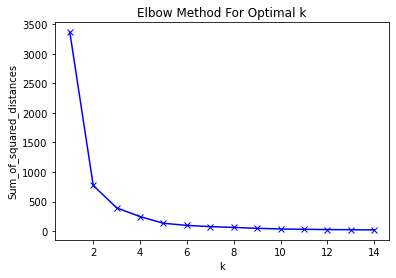

In [70]:
#Determine optimal k
combined_grouped_clustering = df_clustering.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(combined_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [71]:
#Cluster neighbourhoods
# set number of clusters


kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(combined_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 2, 0, 1, 2, 1, 1, 2, 0], dtype=int32)

In [72]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

combined_merged = df_combined


combined_merged = combined_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

combined_merged.head()

City Neighborhood  Latitude   Longitude  Distance from city centre  \
0  Singapore   Ang Mo Kio  1.370080  103.849523                   8.713848   
1  Singapore        Bedok  1.323976  103.930216                   9.607766   
2  Singapore       Bishan  1.350986  103.848255                   6.594669   
3  Singapore     Boon Lay  1.338550  103.705812                  16.844590   
4  Singapore  Bukit Batok  1.349057  103.749591                  12.849412   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             1.0           Coffee Shop          Dessert Shop   
1             1.0           Coffee Shop    Chinese Restaurant   
2             2.0           Coffee Shop            Food Court   
3             0.0   Japanese Restaurant      Asian Restaurant   
4             1.0           Coffee Shop    Chinese Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0   Japanese Restaurant            Food Court           Supermarket   
1        Sandwich Place      Asian Restaurant   Japanese Restaurant   
2    Chinese Restaurant       Bubble Tea Shop                  Café   
3  Fast Food Restaurant          Dessert Shop    Chinese Restaurant   
4            Food Court  Fast Food Restaurant      Department Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0       Bubble Tea Shop           Snack Place    Miscellaneous Shop   
1            Food Court                  Café          Noodle House   
2           Supermarket        Ice Cream Shop        Cosmetics Shop   
3           Coffee Shop            Playground                  Café   
4     Mobile Phone Shop         Shopping Mall      Malay Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0   Fried Chicken Joint         Breakfast Spot  
1  Fast Food Restaurant            Supermarket  
2   Japanese Restaurant       Asian Restaurant  
3                   Spa      Indian Restaurant  
4                  Café         Sandwich Place

After we have segment the neighborhood using k-means clustering, we will add the respective cluster labels into our dataframe.

We now hae a dataframe showing the city name, neighborhood, latitude and longitudes of the neighborhood, their distance from city centre, their cluster labels and the top 10 most common venue categories.

In [73]:
combined_merged['Cluster Labels']=combined_merged['Cluster Labels'].fillna(0).astype(int)
combined_merged

City              Neighborhood   Latitude   Longitude  \
0   Singapore                Ang Mo Kio   1.370080  103.849523   
1   Singapore                     Bedok   1.323976  103.930216   
2   Singapore                    Bishan   1.350986  103.848255   
3   Singapore                  Boon Lay   1.338550  103.705812   
4   Singapore               Bukit Batok   1.349057  103.749591   
5   Singapore               Bukit Merah   1.270439  103.828318   
6   Singapore             Bukit Panjang   1.379149  103.761413   
7   Singapore               Bukit Timah   1.354690  103.776372   
8   Singapore   Central Water Catchment   1.375708  103.801743   
9   Singapore                    Changi   1.351080  103.990064   
10  Singapore                Changi Bay   1.316850  104.020649   
11  Singapore             Choa Chu Kang   1.384749  103.744534   
12  Singapore                  Clementi   1.315100  103.765231   
13  Singapore             Downtown Core   1.287475  103.856033   
14  Singapore                   Geylang   1.318186  103.887056   
15  Singapore                   Hougang   1.370801  103.892544   
16  Singapore               Jurong East   1.333108  103.742294   
17  Singapore               Jurong West   1.339636  103.707339   
18  Singapore                   Kallang   1.310759  103.866262   
19  Singapore              Lim Chu Kang   1.434217  103.714987   
20  Singapore                    Mandai   1.423535  103.803350   
21  Singapore               Marina East   1.288624  103.869827   
22  Singapore              Marina South   1.276998  103.861500   
23  Singapore             Marine Parade   1.302689  103.907395   
24  Singapore                    Museum   1.296052  103.847599   
25  Singapore                    Newton   1.313183  103.838040   
26  Singapore     North-Eastern Islands   1.382882  104.050726   
27  Singapore                    Novena   1.320526  103.843881   
28  Singapore                   Orchard   1.303427  103.831342   
29  Singapore                    Outram   1.282870  103.837860   
30  Singapore                 Pasir Ris   1.373031  103.949255   
31  Singapore                Paya Lebar   1.317480  103.892353   
32  Singapore                   Pioneer   1.337588  103.697410   
33  Singapore                   Punggol   1.405197  103.902350   
34  Singapore                Queenstown   1.294623  103.806037   
35  Singapore              River Valley   1.297582  103.836514   
36  Singapore                    Rochor   1.303918  103.852789   
37  Singapore                   Seletar   1.409849  103.877379   
38  Singapore                 Sembawang   1.449093  103.820055   
39  Singapore                  Sengkang   1.391924  103.895491   
40  Singapore                 Serangoon   1.349761  103.873684   
41  Singapore                   Simpang   1.445295  103.849743   
42  Singapore           Singapore River   1.289178  103.845154   
43  Singapore          Southern Islands   1.199182  103.760249   
44  Singapore              Straits View   1.255708  103.862228   
45  Singapore              Sungei Kadut   1.414997  103.753311   
46  Singapore                  Tampines   1.354653  103.943571   
47  Singapore                   Tanglin   1.306044  103.815280   
48  Singapore                    Tengah   1.362453  103.725040   
49  Singapore                 Toa Payoh   1.335391  103.849741   
50  Singapore                      Tuas   1.329372  103.648236   
51  Singapore           Western Islands   1.250883  103.687883   
52  Singapore   Western Water Catchment   1.366452  103.681031   
53  Singapore                 Woodlands   1.436897  103.786216   
54  Singapore                    Yishun   1.429384  103.835028   
55  Hong Kong       Central and Western  22.284918  114.158304   
56  Hong Kong         Eastern Hong Kong  22.284918  114.158304   
57  Hong Kong        Southern Hong Kong  22.219263  114.225230   
58  Hong Kong                  Wan Chai  22.279015  114.172483   
59  Hong Kong              Sham Shui Po  22.32819

Let's visualize the distribution of the clusters by plotting a map for Singapore and Hong Kong. Each marker represents a neighborhood and the marker color represent the cluster it is in.

Cluster map for Singapore neighborhoods:

In [74]:
# create map
map_clusters_singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(combined_merged['Latitude'], combined_merged['Longitude'], combined_merged['Neighborhood'], combined_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_singapore)
       
map_clusters_singapore

Cluster map for Hong Kong neighborhood:

In [75]:
# create map
map_clusters_hongkong = folium.Map(location=[latitude2, longitude2], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(combined_merged['Latitude'], combined_merged['Longitude'], combined_merged['Neighborhood'], combined_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_hongkong)
       
map_clusters_hongkong

Further look into the 3 clusters, below are some of the similarities:

- Cluster 0 - Countryside area, close to nature (e.g. mountains, parks, seaside), further away from city centre
- Cluster 1 - Suburban area, with plenty of eateries, shops and markets
- Cluster 2 - Urban area, with tourist attractions and shopping malls

In the next section, we will use the clustering results to provide recommendations for our target customer. Just to recap their information and preferences:
- A young couple without any children
- Work in banking industry in CBD area
- Do not drive
- Currently staying in Sha Tin in Hong Kong
- Enjoy hanging out in cafes and shopping during their rest days

According to our clustering results, our target customers currently move in Sha Tin which falls under Suburban Cluster. We will explore further on the neighborhoods in Singapore which is under the same cluster.

Let's take a look at how many neighborhoods are there in each cluster in Singapore:

In [76]:
singapore_clustered = combined_merged[combined_merged['City']=='Singapore']
#Check the number of neighborhood in each cluster
singapore_clustered.groupby('Cluster Labels').count()

City  Neighborhood  Latitude  Longitude  \
Cluster Labels                                            
0                 20            20        20         20   
1                 13            13        13         13   
2                 22            22        22         22   

                Distance from city centre  1st Most Common Venue  \
Cluster Labels                                                     
0                                      20                     16   
1                                      13                     13   
2                                      22                     22   

                2nd Most Common Venue  3rd Most Common Venue  \
Cluster Labels                                                 
0                                  16                     16   
1                                  13                     13   
2                                  22                     22   

                4th Most Common Venue  5th Most Common Venue  \
Cluster Labels                                                 
0                                  16                     16   
1                                  13                     13   
2                                  22                     22   

                6th Most Common Venue  7th Most Common Venue  \
Cluster Labels                                                 
0                                  16                     16   
1                                  13                     13   
2                                  22                     22   

                8th Most Common Venue  9th Most Common Venue  \
Cluster Labels                                                 
0                                  16                     16   
1                                  13                     13   
2                                  22                     22   

                10th Most Common Venue  
Cluster Labels                          
0                                   16  
1                                   13  
2                                   22

In Singapore, there are 20 neighborhoods in Coutryside cluster, 13 neighborhoods in Suburban cluster and 22 neighborhoods in Urban cluster.

Below is the list of Singapore neighborhoods in Suburban Cluster:

In [77]:
singapore_suburban = combined_merged[(combined_merged['City']=='Singapore')&(combined_merged['Cluster Labels']==1)]
singapore_suburban.reset_index(drop=True)

City   Neighborhood  Latitude   Longitude  Distance from city centre  \
0   Singapore     Ang Mo Kio  1.370080  103.849523                   8.713848   
1   Singapore          Bedok  1.323976  103.930216                   9.607766   
2   Singapore    Bukit Batok  1.349057  103.749591                  12.849412   
3   Singapore  Bukit Panjang  1.379149  103.761413                  13.833367   
4   Singapore    Bukit Timah  1.354690  103.776372                  10.768272   
5   Singapore       Clementi  1.315100  103.765231                   9.770905   
6   Singapore        Hougang  1.370801  103.892544                   9.983495   
7   Singapore    Jurong East  1.333108  103.742294                  12.821293   
8   Singapore      Pasir Ris  1.373031  103.949255                  14.259686   
9   Singapore        Punggol  1.405197  103.902350                  13.892026   
10  Singapore        Seletar  1.409849  103.877379                  13.480592   
11  Singapore       Sengkang  1.391924  103.895491                  12.233702   
12  Singapore       Tampines  1.354653  103.943571                  12.532091   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                1           Coffee Shop          Dessert Shop   
1                1           Coffee Shop    Chinese Restaurant   
2                1           Coffee Shop    Chinese Restaurant   
3                1           Coffee Shop      Sushi Restaurant   
4                1                 Trail             Rest Area   
5                1           Coffee Shop            Food Court   
6                1  Fast Food Restaurant            Food Court   
7                1   Japanese Restaurant           Coffee Shop   
8                1            Food Court           Coffee Shop   
9                1  Fast Food Restaurant   Japanese Restaurant   
10               1                  Café            Food Court   
11               1            Food Court  Fast Food Restaurant   
12               1                  Café                Bakery   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Japanese Restaurant            Food Court           Supermarket   
1         Sandwich Place      Asian Restaurant   Japanese Restaurant   
2             Food Court  Fast Food Restaurant      Department Store   
3   Fast Food Restaurant                  Café                   Gym   
4         Scenic Lookout                  Hill                   Zoo   
5           Dessert Shop    Chinese Restaurant      Asian Restaurant   
6            Coffee Shop    Chinese Restaurant                  Café   
7     Chinese Restaurant            Food Court         Shopping Mall   
8     Italian Restaurant  Fast Food Restaurant              Bus Line   
9            Supermarket                  Café    Chinese Restaurant   
10       Harbor / Marina           Snack Place  Fast Food Restaurant   
11           Coffee Shop          Noodle House        Sandwich Place   
12           Coffee Shop      Sushi Restaurant       Bubble Tea Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Bubble Tea Shop           Snack Place    Miscellaneous Shop   
1             Food Court                  Café          Noodle House   
2      Mobile Phone Shop         Shopping Mall      Malay Restaurant   
3       Asian Restaurant         Shopping Mall     Convenience Store   
4     English Restaurant           Event Space               Exhibit   
5        Thai Restaurant     Electronics Store    Dim Sum Restaurant   
6           Dessert Shop           Supermarket           Bus Station   
7                   Café        Sandwich Place       Bubble Tea Shop   
8            Bus Station        Sandwich Place              Pharmacy   
9             Steakhouse    Light Rail Station              Tea Room   
10           Event Space               Exhibit                  Farm   
11                  Café      Sculpture Garden         Metro Station   
12  

In [78]:
singapore_suburban.shape

(13, 16)

We now have a list of Singapore neighborhoods under Suburban Cluster.

Since our target customer will not be driving in Singapore, they will probably leverage on the public transportation to commute in the city. MRT (Mass Rapid Transit) is the railway network which connect different parts of Singapore. In the Data portion of the project, we have obtained the list of MRT Stations in Singapore. Let's look into our neighborhoods and filter our those with access to MRT network.

In [79]:
m = singapore_suburban.Neighborhood.isin(df_mrt.MRT_Station)
singapore_suburban_mrt = singapore_suburban[m].reset_index(drop=True)
singapore_suburban_mrt

City   Neighborhood  Latitude   Longitude  Distance from city centre  \
0   Singapore     Ang Mo Kio  1.370080  103.849523                   8.713848   
1   Singapore          Bedok  1.323976  103.930216                   9.607766   
2   Singapore    Bukit Batok  1.349057  103.749591                  12.849412   
3   Singapore  Bukit Panjang  1.379149  103.761413                  13.833367   
4   Singapore       Clementi  1.315100  103.765231                   9.770905   
5   Singapore        Hougang  1.370801  103.892544                   9.983495   
6   Singapore    Jurong East  1.333108  103.742294                  12.821293   
7   Singapore      Pasir Ris  1.373031  103.949255                  14.259686   
8   Singapore        Punggol  1.405197  103.902350                  13.892026   
9   Singapore       Sengkang  1.391924  103.895491                  12.233702   
10  Singapore       Tampines  1.354653  103.943571                  12.532091   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                1           Coffee Shop          Dessert Shop   
1                1           Coffee Shop    Chinese Restaurant   
2                1           Coffee Shop    Chinese Restaurant   
3                1           Coffee Shop      Sushi Restaurant   
4                1           Coffee Shop            Food Court   
5                1  Fast Food Restaurant            Food Court   
6                1   Japanese Restaurant           Coffee Shop   
7                1            Food Court           Coffee Shop   
8                1  Fast Food Restaurant   Japanese Restaurant   
9                1            Food Court  Fast Food Restaurant   
10               1                  Café                Bakery   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Japanese Restaurant            Food Court           Supermarket   
1         Sandwich Place      Asian Restaurant   Japanese Restaurant   
2             Food Court  Fast Food Restaurant      Department Store   
3   Fast Food Restaurant                  Café                   Gym   
4           Dessert Shop    Chinese Restaurant      Asian Restaurant   
5            Coffee Shop    Chinese Restaurant                  Café   
6     Chinese Restaurant            Food Court         Shopping Mall   
7     Italian Restaurant  Fast Food Restaurant              Bus Line   
8            Supermarket                  Café    Chinese Restaurant   
9            Coffee Shop          Noodle House        Sandwich Place   
10           Coffee Shop      Sushi Restaurant       Bubble Tea Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Bubble Tea Shop           Snack Place    Miscellaneous Shop   
1             Food Court                  Café          Noodle House   
2      Mobile Phone Shop         Shopping Mall      Malay Restaurant   
3       Asian Restaurant         Shopping Mall     Convenience Store   
4        Thai Restaurant     Electronics Store    Dim Sum Restaurant   
5           Dessert Shop           Supermarket           Bus Station   
6                   Café        Sandwich Place       Bubble Tea Shop   
7            Bus Station        Sandwich Place              Pharmacy   
8             Steakhouse    Light Rail Station              Tea Room   
9                   Café      Sculpture Garden         Metro Station   
10         Shopping Mall  Fast Food Restaurant            Food Court   

      9th Most Common Venue   10th Most Common Venue  
0       Fried Chicken Joint           Breakfast Spot  
1      Fast Food Restaurant              Supermarket  
2                      Café           Sandwich Place  
3                 Bookstore  Chinese Breakfast Place  
4   Chinese Breakfast Place                   Bakery  
5             Shopping Mall     Kitchen Supply Store  
6          Asian Restaurant        Korean Restaurant  
7                      Park               Restaurant  
8                R

In [80]:
singapore_suburban_mrt.shape

(11, 16)

Out of the 13 neighborhoods in cluster 2, there are 11 of them with access to MRT network.

Besides MRT accessibility, we would like to provide our suggestion based on the target customers' lifestyle preferences. From our target customers' profile, we can see that they enjoy shopping and hanging out in cafes. Let's explore the 11 neighborhoods to see which neighborhoods have shopping malls and cafes. 

We will first combine the top 5 common venues category into a separate column.

In [81]:
singapore_suburban_mrt['top5']= singapore_suburban_mrt[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)

In [82]:
pd.set_option('display.max_colwidth', None)
singapore_suburban_mrt

City   Neighborhood  Latitude   Longitude  Distance from city centre  \
0   Singapore     Ang Mo Kio  1.370080  103.849523                   8.713848   
1   Singapore          Bedok  1.323976  103.930216                   9.607766   
2   Singapore    Bukit Batok  1.349057  103.749591                  12.849412   
3   Singapore  Bukit Panjang  1.379149  103.761413                  13.833367   
4   Singapore       Clementi  1.315100  103.765231                   9.770905   
5   Singapore        Hougang  1.370801  103.892544                   9.983495   
6   Singapore    Jurong East  1.333108  103.742294                  12.821293   
7   Singapore      Pasir Ris  1.373031  103.949255                  14.259686   
8   Singapore        Punggol  1.405197  103.902350                  13.892026   
9   Singapore       Sengkang  1.391924  103.895491                  12.233702   
10  Singapore       Tampines  1.354653  103.943571                  12.532091   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                1           Coffee Shop          Dessert Shop   
1                1           Coffee Shop    Chinese Restaurant   
2                1           Coffee Shop    Chinese Restaurant   
3                1           Coffee Shop      Sushi Restaurant   
4                1           Coffee Shop            Food Court   
5                1  Fast Food Restaurant            Food Court   
6                1   Japanese Restaurant           Coffee Shop   
7                1            Food Court           Coffee Shop   
8                1  Fast Food Restaurant   Japanese Restaurant   
9                1            Food Court  Fast Food Restaurant   
10               1                  Café                Bakery   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Japanese Restaurant            Food Court           Supermarket   
1         Sandwich Place      Asian Restaurant   Japanese Restaurant   
2             Food Court  Fast Food Restaurant      Department Store   
3   Fast Food Restaurant                  Café                   Gym   
4           Dessert Shop    Chinese Restaurant      Asian Restaurant   
5            Coffee Shop    Chinese Restaurant                  Café   
6     Chinese Restaurant            Food Court         Shopping Mall   
7     Italian Restaurant  Fast Food Restaurant              Bus Line   
8            Supermarket                  Café    Chinese Restaurant   
9            Coffee Shop          Noodle House        Sandwich Place   
10           Coffee Shop      Sushi Restaurant       Bubble Tea Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Bubble Tea Shop           Snack Place    Miscellaneous Shop   
1             Food Court                  Café          Noodle House   
2      Mobile Phone Shop         Shopping Mall      Malay Restaurant   
3       Asian Restaurant         Shopping Mall     Convenience Store   
4        Thai Restaurant     Electronics Store    Dim Sum Restaurant   
5           Dessert Shop           Supermarket           Bus Station   
6                   Café        Sandwich Place       Bubble Tea Shop   
7            Bus Station        Sandwich Place              Pharmacy   
8             Steakhouse    Light Rail Station              Tea Room   
9                   Café      Sculpture Garden         Metro Station   
10         Shopping Mall  Fast Food Restaurant            Food Court   

      9th Most Common Venue   10th Most Common Venue  \
0       Fried Chicken Joint           Breakfast Spot   
1      Fast Food Restaurant              Supermarket   
2                      Café           Sandwich Place   
3                 Bookstore  Chinese Breakfast Place   
4   Chinese Breakfast Place                   Bakery   
5             Shopping Mall     Kitchen Supply Store   
6          Asian Restaurant        Korean Restaurant   
7                      Park               Restaurant   
8        

Let's filter the neighborhoods with "Shopping Mall" or "Cafe" as their top 5 venue categories.

In [83]:
preference = singapore_suburban_mrt[singapore_suburban_mrt['top5'].str.contains('Shopping Mall|Café',na=False)]
preference

City   Neighborhood  Latitude   Longitude  Distance from city centre  \
3   Singapore  Bukit Panjang  1.379149  103.761413                  13.833367   
5   Singapore        Hougang  1.370801  103.892544                   9.983495   
6   Singapore    Jurong East  1.333108  103.742294                  12.821293   
8   Singapore        Punggol  1.405197  103.902350                  13.892026   
10  Singapore       Tampines  1.354653  103.943571                  12.532091   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                1           Coffee Shop      Sushi Restaurant   
5                1  Fast Food Restaurant            Food Court   
6                1   Japanese Restaurant           Coffee Shop   
8                1  Fast Food Restaurant   Japanese Restaurant   
10               1                  Café                Bakery   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3   Fast Food Restaurant                  Café                   Gym   
5            Coffee Shop    Chinese Restaurant                  Café   
6     Chinese Restaurant            Food Court         Shopping Mall   
8            Supermarket                  Café    Chinese Restaurant   
10           Coffee Shop      Sushi Restaurant       Bubble Tea Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3       Asian Restaurant         Shopping Mall     Convenience Store   
5           Dessert Shop           Supermarket           Bus Station   
6                   Café        Sandwich Place       Bubble Tea Shop   
8             Steakhouse    Light Rail Station              Tea Room   
10         Shopping Mall  Fast Food Restaurant            Food Court   

   9th Most Common Venue   10th Most Common Venue  \
3              Bookstore  Chinese Breakfast Place   
5          Shopping Mall     Kitchen Supply Store   
6       Asian Restaurant        Korean Restaurant   
8             Restaurant   Furniture / Home Store   
10    Chinese Restaurant                      Gym   

                                                                                top5  
3                     Coffee Shop, Sushi Restaurant, Fast Food Restaurant, Café, Gym  
5            Fast Food Restaurant, Food Court, Coffee Shop, Chinese Restaurant, Café  
6    Japanese Restaurant, Coffee Shop, Chinese Restaurant, Food Court, Shopping Mall  
8   Fast Food Restaurant, Japanese Restaurant, Supermarket, Café, Chinese Restaurant  
10                      Café, Bakery, Coffee Shop, Sushi Restaurant, Bubble Tea Shop

We now have 5 neighborhoods on our list - Bukit Panjang, Hougang, Jurong East, Punggol and Tampines! 

We are going to recommend these 5 neighborhoods to our target customers. These 5 neighborhoods are in suburban areas like Sha Tin (their current neighborhood in Hong Kong). They have easy access to MRT network for them to get around Singapore or commute to work to city centre easily. There are also shopping malls and cafes in these neighborhoods which suit their lifestyle as well.

Let's take a look at where these neighborhood are located by plotting a folium map. On the below map we have indicated the 5 recommended neighborhoods in blue markers, and the city centre in green marker.

In [84]:
# create map
map_recommendation = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(combined_merged['Latitude'], combined_merged['Longitude'], combined_merged['Neighborhood'], combined_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if poi == 'Bukit Panjang':
        folium.Marker(location=[lat, lon],
        icon=Icon(color='blue',icon_color='darkblue',icon='star'),
        popup=label).add_to(map_recommendation)
    elif poi == 'Hougang':
        folium.Marker(location=[lat, lon],
        icon=Icon(color='blue',icon_color='darkblue',icon='star'),
        popup=label).add_to(map_recommendation)
    elif poi == 'Jurong East':
        folium.Marker(location=[lat, lon],
        icon=Icon(color='blue',icon_color='darkblue',icon='star'),
        popup=label).add_to(map_recommendation)
    elif poi == 'Punggol':
        folium.Marker(location=[lat, lon],
        icon=Icon(color='blue',icon_color='darkblue',icon='star'),
        popup=label).add_to(map_recommendation)
    elif poi == 'Tampines':
        folium.Marker(location=[lat, lon],
        icon=Icon(color='blue',icon_color='darkblue',icon='star'),
        popup=label).add_to(map_recommendation)
    else:
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_recommendation)
folium.Marker(location=[1.291667, 103.85], icon=Icon(color='green',icon_color='darkgreen', icon='briefcase'),
        popup='City Centre').add_to(map_recommendation)        

map_recommendation

We will then create a list of venues and map for the 5 neighborhoods which will be presented to our target customers. For each neighborhood, we will prepare a list of venues for our customer to explore. An interactive map will also be prepared, indicating all the venues in the neighborhood, with Cafes and Shopping Malls showing as different icons and colors to easy identification. Venue addresses will also be included in the marker labels.

### Recommendation 1 - Bukit Panjang
Let's explore the surrounding of Bukit Panjang:

Below is the list of venues in Bukit Panjang that we have retrieved from Foursquare API earlier:

In [85]:
bukitpanjang_venues = singapore_venues_address[singapore_venues_address.Neighborhood == 'Bukit Panjang']
bukitpanjang_poi = bukitpanjang_venues.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'],axis=1).reset_index(drop=True)
bukitpanjang_poi.to_excel("bukitpanjangpoi.xlsx")
bukitpanjang_poi


Neighborhood                                                Venue  \
0   Bukit Panjang                                            Starbucks   
1   Bukit Panjang                                          Penyet Town   
2   Bukit Panjang                                            Starbucks   
3   Bukit Panjang                         Old Street Bak Kut Teh 老街肉骨茶   
4   Bukit Panjang                                           McDonald's   
5   Bukit Panjang                                     Teo Heng Karaoke   
6   Bukit Panjang                                         Hillion Mall   
7   Bukit Panjang                                       The Gym Nation   
8   Bukit Panjang                               Hai Xian Zhu Zhou 海鲜煮粥   
9   Bukit Panjang                                               Subway   
10  Bukit Panjang                                          Osaka Ohsho   
11  Bukit Panjang                                      Churros Factory   
12  Bukit Panjang                                                 LiHO   
13  Bukit Panjang                                            Fun Toast   
14  Bukit Panjang                                                  KFC   
15  Bukit Panjang                                  Bukit Panjang Plaza   
16  Bukit Panjang                                 Sushi Express 爭鮮迴轉壽司   
17  Bukit Panjang                                            Swensen's   
18  Bukit Panjang                            Phoenix LRT Station (BP5)   
19  Bukit Panjang              Shan Cheng Ipoh Delicacies (Shan Cheng)   
20  Bukit Panjang                                            Nice Cafe   
21  Bukit Panjang                                             Maki-san   
22  Bukit Panjang                                           McDonald's   
23  Bukit Panjang                                       Eighteen Chefs   
24  Bukit Panjang                                          Burger King   
25  Bukit Panjang                                        Ichiban Sushi   
26  Bukit Panjang                         Saizeriya Ristorante E Caffe   
27  Bukit Panjang                                          i love yoo!   
28  Bukit Panjang                                    Popular Bookstore   
29  Bukit Panjang                                          BBQ Express   
30  Bukit Panjang                    Blk 163 Bukit Panjang Coffee Shop   
31  Bukit Panjang                                     FairPrice Finest   
32  Bukit Panjang                                            Wang Cafe   
33  Bukit Panjang                              Men-ichi Japanese Ramen   
34  Bukit Panjang  Ju Hao Xiao Long Bao 聚豪拉面小龙包 (Ju Hao Xiao Long Bao)   
35  Bukit Panjang                                             7-Eleven   
36  Bukit Panjang                                       Gym@Maysprings   
37  Bukit Panjang                                               163雲吞面   

             Venue Category  \
0               Coffee Shop   
1     Indonesian Restaurant   
2               Coffee Shop   
3                     Diner   
4      Fast Food Restaurant   
5               Karaoke Bar   
6             Shopping Mall   
7                       Gym   
8              Noodle House   
9            Sandwich Place   
10               Restaurant   
11                     Café   
12          Bubble Tea Shop   
13  Chinese Breakfast Place   
14      Fried Chicken Joint   
15            Shopping Mall   
16         Sushi Restaurant   
17      American Restaurant   
18       Light Rail Station   
19         Asian Restaurant   
20         Asian Restaurant   
21         Sushi Restaurant   
22     Fast Food Restaurant   
23                   Bistro   
24     Fast Food Restaurant   
25         Sushi Restaurant   
26       Italian Restaurant   
27       Dim Sum Restaurant   
28                Bookstore   
29                BBQ Joint   
30              Coffee Shop   
31              Supermarket   
32                     Café   
33         Ramen Restaurant   
34      Dumpling Restaurant   
35

As our target customers are interested in cafes and shopping malls, let's create a map for Bukit Panjang indicating all the venues around the area. Cafes and shopping malls are highlighted in blue and red respectively with different icons. 

In [86]:
# create map of Bukit Panjang using latitude and longitude values
map_bukitpanjang = folium.Map(location=[1.379149, 103.761413], zoom_start=16)

# add markers to map
for lat, lng, venue, category, address in zip(bukitpanjang_venues['Venue Latitude'], bukitpanjang_venues['Venue Longitude'], bukitpanjang_venues['Venue'], bukitpanjang_venues['Venue Category'], bukitpanjang_venues['Venue Address']):
    label = '{} {}'.format(venue, address)
    label = folium.Popup(label, parse_html=True)
    if category == 'Café':
        folium.Marker(location=[lat, lng],
        icon=Icon(color='blue',icon_color='darkblue',icon='cutlery'),
        popup=label).add_to(map_bukitpanjang)
    elif category =='Shopping Mall':
        folium.Marker(
        location=[lat, lng],
        icon=Icon(color='red',icon_color='deepred',icon='shopping-cart'),
        popup=label).add_to(map_bukitpanjang)
    else:
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bukitpanjang)

        
map_bukitpanjang

### Recommendation 2 - Hougang

Below is the list of venues in Hougang:

In [87]:
hougang_venues = singapore_venues_address[singapore_venues_address.Neighborhood == 'Hougang']
hougang_poi = hougang_venues.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'],axis=1).reset_index(drop=True)
hougang_poi.to_excel("hougangpoi.xlsx")
hougang_poi

Neighborhood                                       Venue  \
0       Hougang                             Phoon Huat & Co   
1       Hougang                               Dessert Story   
2       Hougang                   Tiew Mai Thai Boat Noodle   
3       Hougang                成發咖啡屋 Seng Huat Coffee House   
4       Hougang                                        Qiji   
5       Hougang                        Soup Restaurant 三盅兩件   
6       Hougang                                      Subway   
7       Hougang                  5 Star Corner Western Food   
8       Hougang                                        Yolé   
9       Hougang                                Pepper Lunch   
10      Hougang                              NTUC FairPrice   
11      Hougang              Old Street Bak Kut Teh 驰名老街肉骨茶   
12      Hougang                              Toast Box 土司工坊   
13      Hougang                      805 Hougang Coffeeshop   
14      Hougang                         Hougang Sports Hall   
15      Hougang                                   Starbucks   
16      Hougang                                     Watsons   
17      Hougang            Peng Restaurant Catering Service   
18      Hougang                           Popular Bookstore   
19      Hougang                                  McDonald's   
20      Hougang                              NTUC FairPrice   
21      Hougang                  Hougang MRT Station (NE14)   
22      Hougang                                         KFC   
23      Hougang                                   Kawa Cafe   
24      Hougang                               Ichiban Sushi   
25      Hougang                   The Manhattan Fish Market   
26      Hougang                                   Pizza Hut   
27      Hougang                                Hougang Mall   
28      Hougang                   Ah Seng Bak Kut Teh 阿成肉骨茶   
29      Hougang                               Kang Kar Mall   
30      Hougang  Top Bean @ Hougang Central Bus Interchange   
31      Hougang                        Hougang ActiveSG Gym   
32      Hougang                             The Paper Stone   
33      Hougang                            Kimly Coffeeshop   
34      Hougang                    精英 Jing Ying Coffee Shop   
35      Hougang                              Bus Stop 64379   
36      Hougang            Bus Stop 63069 (Nativity Ch Ctr)   

          Venue Category  \
0   Kitchen Supply Store   
1           Dessert Shop   
2        Thai Restaurant   
3             Food Court   
4       Asian Restaurant   
5     Chinese Restaurant   
6         Sandwich Place   
7            Coffee Shop   
8     Frozen Yogurt Shop   
9   Fast Food Restaurant   
10           Supermarket   
11    Chinese Restaurant   
12                  Café   
13            Food Court   
14    Athletics & Sports   
15           Coffee Shop   
16              Pharmacy   
17    Chinese Restaurant   
18             Bookstore   
19  Fast Food Restaurant   
20           Supermarket   
21         Metro Station   
22  Fast Food Restaurant   
23                  Café   
24      Sushi Restaurant   
25     Fish & Chips Shop   
26           Pizza Place   
27         Shopping Mall   
28            Soup Place   
29         Shopping Mall   
30          Dessert Shop   
31                   Gym   
32   Arts & Crafts Store   
33            Food Court   
34           Coffee Shop   
35           Bus Station   
36           Bus Station   

                                                                Venue Address  
0                            [804 Hougang Central #01-134, 278116, Singapore]  
1               [#02-18 Hougang Mall (90 Hougang Ave. 10), 538766, Singapore]  
2         [1187 Upper Serangoon Road (#01-22 The Midtown), 533971, Singapore]  
3                          [811 Hougang Central. #01-206., 530811, Singapore]  
4                [#01-41 Hougang Mall (90 Hougang Ave 10), 538766, Singapore]  
5            [#02-21, Hougang Mall (90 Hougang Avenue 10), 5387

Below is the map for Hougang indicating all the venues around the area. 

In [88]:
# create map of Hougang using latitude and longitude values
map_hougang = folium.Map(location=[1.370801,103.892544], zoom_start=16)

# add markers to map
for lat, lng, venue, category, address in zip(hougang_venues['Venue Latitude'], hougang_venues['Venue Longitude'], hougang_venues['Venue'], hougang_venues['Venue Category'], hougang_venues['Venue Address']):
    label = '{} {}'.format(venue, address)
    label = folium.Popup(label, parse_html=True)
    if category == 'Café':
        folium.Marker(location=[lat, lng],
        icon=Icon(color='blue',icon_color='darkblue',icon='cutlery'),
        popup=label).add_to(map_hougang)
    elif category =='Shopping Mall':
        folium.Marker(
        location=[lat, lng],
        icon=Icon(color='red',icon_color='deepred',icon='shopping-cart'),
        popup=label).add_to(map_hougang)
    else:
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hougang)

        
map_hougang

### Recommendation 3 - Jurong East
Below is the list of venues in Jurong East:

In [89]:
jurongeast_venues = singapore_venues_address[singapore_venues_address.Neighborhood == 'Jurong East']
jurongeast_poi = jurongeast_venues.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'],axis=1).reset_index(drop=True)
jurongeast_poi.to_excel("jurongeastpoi.xlsx")
jurongeast_poi

Neighborhood                                                    Venue  \
0   Jurong East                                                   UNIQLO   
1   Jurong East                                                MUJI 無印良品   
2   Jurong East                                              Johan Paris   
3   Jurong East                                Song Fa Bak Kut Teh 松發肉骨茶   
4   Jurong East  Tonkatsu by Ma Maison とんかつ マメゾン (Tonkatsu by Ma Maison)   
5   Jurong East                                                 The Rink   
6   Jurong East                          Dian Xiao Er 店小二 (Dian Xiao Er)   
7   Jurong East                                         Books Kinokuniya   
8   Jurong East                                        Cathay Cineplexes   
9   Jurong East                                    Platinum Movie Suites   
10  Jurong East                                          Zaffron Kitchen   
11  Jurong East       Tsukada Nojo 塚田農場 Japanese "Bijin Nabe" Restaurant   
12  Jurong East                                                 Westgate   
13  Jurong East                                                     Yolé   
14  Jurong East                                             Pepper Lunch   
15  Jurong East                 Paradise Dynasty 樂天皇朝 (Paradise Dynasty)   
16  Jurong East                                           FairPrice Xtra   
17  Jurong East                                                      Jem   
18  Jurong East                                    Beng Hiang Restaurant   
19  Jurong East                                                   J-Walk   
20  Jurong East                                                      H&M   
21  Jurong East                                                Green Dot   
22  Jurong East                                                Robinsons   
23  Jurong East                                                  Sabar38   
24  Jurong East                                                 KOI Café   
25  Jurong East                               The Coffee Bean & Tea Leaf   
26  Jurong East                                    Aburi Sushi Heishirou   
27  Jurong East                                               MOS Burger   
28  Jurong East                             Saizeriya Ristorante E Caffe   
29  Jurong East                                      Teo Heng KTV Studio   
30  Jurong East                                                Chir Chir   
31  Jurong East                               Soi 19 Thailand Wanton Mee   
32  Jurong East                                               一風堂 Ippudo   
33  Jurong East                                                Sushi Tei   
34  Jurong East                                         IMM Garden Plaza   
35  Jurong East                            Hai Di Lao 海底捞火锅 (Hai Di Lao)   
36  Jurong East                                         Din Tai Fung 鼎泰豐   
37  Jurong East                    Brotzeit German Bier Bar & Restaurant   
38  Jurong East                                     Coach Factory Outlet   
39  Jurong East                                       Shaburi And Kintan   
40  Jurong East                                                Starbucks   
41  Jurong East                                                Starbucks   
42  Jurong East                                           Paris Baguette   
43  Jurong East                          Soup Restaurant Teahouse 三盅兩件茶楼   
44  Jurong East                                       Nike Factory Store   
45  Jurong East                                            Share Tea 歇脚亭   
46  Jurong East                                                Starbucks   
47  Jurong East                                   Fitness First Platinum   
48  Jurong East                                           Nipong Naepong   
49  Jurong East                                    Oppa Korean Grill BBQ   
50  Jurong East                                        Timberland Outlet   
51  Jurong East                                    

Below is the map for Jurong East indicating all the venues around the area.

In [90]:
# create map of Jurong East using latitude and longitude values
map_jurongeast = folium.Map(location=[1.333108,103.742294], zoom_start=16)

# add markers to map
for lat, lng, venue, category, address in zip(jurongeast_venues['Venue Latitude'], jurongeast_venues['Venue Longitude'], jurongeast_venues['Venue'], jurongeast_venues['Venue Category'], jurongeast_venues['Venue Address']):
    label = '{} {}'.format(venue, address)
    label = folium.Popup(label, parse_html=True)
    if category == 'Café':
        folium.Marker(location=[lat, lng],
        icon=Icon(color='blue',icon_color='darkblue',icon='cutlery'),
        popup=label).add_to(map_jurongeast)
    elif category =='Shopping Mall':
        folium.Marker(
        location=[lat, lng],
        icon=Icon(color='red',icon_color='deepred',icon='shopping-cart'),
        popup=label).add_to(map_jurongeast)
    else:
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jurongeast)

        
map_jurongeast

### Recommendation 4 - Punggol
Below is the list of venues in Punggol that we have retrieved from Foursquare API earlier:

In [91]:
punggol_venues = singapore_venues_address[singapore_venues_address.Neighborhood == 'Punggol']
punggol_poi = punggol_venues.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'],axis=1).reset_index(drop=True)
punggol_poi.to_excel("punggolpoi.xlsx")
punggol_poi

Neighborhood                                 Venue  \
0       Punggol                        Waterway Point   
1       Punggol                                Uniqlo   
2       Punggol                         Shaw Theatres   
3       Punggol                      Fairprice Fínest   
4       Punggol                             Swensen's   
5       Punggol                      Din Tai Fung 鼎泰豐   
6       Punggol                Uncle Leong Signatures   
7       Punggol                         Social Square   
8       Punggol                             PappaRich   
9       Punggol                                So Pho   
10      Punggol                           Genki Sushi   
11      Punggol                        Toast Box 土司工坊   
12      Punggol                                 Daiso   
13      Punggol                             Starbucks   
14      Punggol                                Subway   
15      Punggol                    Cookhouse by Koufu   
16      Punggol                  The Soup Spoon Union   
17      Punggol                  Rong Hua Bak Kut Teh   
18      Punggol                   McDonald's / McCafe   
19      Punggol            Buddy Hoagies Café & Grill   
20      Punggol                                   KFC   
21      Punggol                         Ichiban Boshi   
22      Punggol                   Tenderfresh Classic   
23      Punggol            The Coffee Bean & Tea Leaf   
24      Punggol                                Cedele   
25      Punggol          Sheng Siong Supermarket 昇菘超市   
26      Punggol                          Venus Beauty   
27      Punggol                          Kitchen+Ware   
28      Punggol               Punggol Bus Interchange   
29      Punggol                          Kiddy Palace   
30      Punggol                       Raffles Medical   
31      Punggol                   Doraemon Theme Park   
32      Punggol  SBS Transit: Punggol LRT (West Loop)   
33      Punggol                        Nam Kee Pau 南記   
34      Punggol                            Best Denki   
35      Punggol                 DANRO Japanese Hotpot   
36      Punggol                        Heartwave Wall   
37      Punggol          Bus Stop 65221 (opp Blk 293)   
38      Punggol                Punggol Discovery Cube   
39      Punggol                Playground @ Coralinus   
40      Punggol               Water Drop Teahouse 滴水坊   
41      Punggol                     Gymnasium @ PRIVÉ   
42      Punggol                Punggol block 272 Park   

             Venue Category  \
0             Shopping Mall   
1            Clothing Store   
2                 Multiplex   
3               Supermarket   
4            Ice Cream Shop   
5        Chinese Restaurant   
6        Seafood Restaurant   
7       Japanese Restaurant   
8          Asian Restaurant   
9     Vietnamese Restaurant   
10         Sushi Restaurant   
11           Breakfast Spot   
12           Discount Store   
13              Coffee Shop   
14           Sandwich Place   
15               Food Court   
16               Soup Place   
17       Chinese Restaurant   
18     Fast Food Restaurant   
19               Steakhouse   
20     Fast Food Restaurant   
21      Japanese Restaurant   
22      Fried Chicken Joint   
23                     Café   
24                     Café   
25              Supermarket   
26  Health & Beauty Service   
27   Furniture / Home Store   
28              Bus Station   
29               Baby Store   
30                 Pharmacy   
31               Theme Park   
32       Light Rail Station   
33              Snack Place   
34        Electronics Store   
35               Restaurant   
36                     Park   
37                 Bus Stop   
38                    Plaza   
39               Playground   
40                 Tea Room   
41                      Gym   
42         Botanical Garden   

                                                                                    Venue Address  
0                            

Below is the map for Punggol indicating all the venues around the area. 

In [92]:
# create map of Jurong East using latitude and longitude values
map_punggol = folium.Map(location=[1.405197,103.902350], zoom_start=16)

# add markers to map
for lat, lng, venue, category, address in zip(punggol_venues['Venue Latitude'], punggol_venues['Venue Longitude'], punggol_venues['Venue'], punggol_venues['Venue Category'], punggol_venues['Venue Address']):
    label = '{} {}'.format(venue, address)
    label = folium.Popup(label, parse_html=True)
    if category == 'Café':
        folium.Marker(location=[lat, lng],
        icon=Icon(color='blue',icon_color='darkblue',icon='cutlery'),
        popup=label).add_to(map_punggol)
    elif category =='Shopping Mall':
        folium.Marker(
        location=[lat, lng],
        icon=Icon(color='red',icon_color='deepred',icon='shopping-cart'),
        popup=label).add_to(map_punggol)
    else:
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_punggol)

        
map_punggol

### Recommendation 5 - Tampines
Below is the list of venues in Tampines:

In [93]:
tampines_venues = singapore_venues_address[singapore_venues_address.Neighborhood == 'Tampines']
tampines_poi = tampines_venues.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude','Venue Longitude'],axis=1).reset_index(drop=True)
tampines_poi.to_excel("tampinespoi.xlsx")
tampines_poi

Neighborhood                                        Venue  \
0      Tampines                               Barcook Bakery   
1      Tampines                               Nakhon Kitchen   
2      Tampines  Starbucks Reserve Store (Starbucks Reserve)   
3      Tampines                      4Fingers Crispy Chicken   
4      Tampines                                Amore Fitness   
5      Tampines                   Lao Ban Soya Beancurd 老伴豆花   
6      Tampines                                Fitness First   
7      Tampines                             Dian Xiao Er 店小二   
8      Tampines                                          H&M   
9      Tampines                                Healing Touch   
10     Tampines                          Tampines Skate Park   
11     Tampines                            Awfully Chocolate   
12     Tampines                             Din Tai Fung 鼎泰豐   
13     Tampines                                       Tori Q   
14     Tampines                                    Starbucks   
15     Tampines                         Ya Kun Kaya Toast 亞坤   
16     Tampines                          Isteak @ Tampines 1   
17     Tampines                                    Toys"R"Us   
18     Tampines                                  Four Leaves   
19     Tampines                                       UNIQLO   
20     Tampines                            Popular Bookstore   
21     Tampines                                   Tampines 1   
22     Tampines                                 Rocky Master   
23     Tampines                                 True Fitness   
24     Tampines                               NTUC Fairprice   
25     Tampines                          Proofer Boulangerie   
26     Tampines                        Ayam Penyet President   
27     Tampines                                         LiHO   
28     Tampines                                   Fish & Co.   
29     Tampines                 Old Street Bak Kut Teh 老街肉骨茶   
30     Tampines                                Tampines Mall   
31     Tampines                                       McCafe   
32     Tampines                                      Nando's   
33     Tampines                                      Watsons   
34     Tampines                              J's Wok & Grill   
35     Tampines                                Sushi Express   
36     Tampines                               NTUC FairPrice   
37     Tampines                                  JPOT Hotpot   
38     Tampines                                    Sushi Tei   
39     Tampines                                 Seoul Garden   
40     Tampines                         J.Co Donuts & Coffee   
41     Tampines                       PUTIEN Restaurant 莆田菜馆   
42     Tampines                      Al Mahboob Indian Rojak   
43     Tampines                                Hawker Centre   
44     Tampines                                  Mr. YouTiao   
45     Tampines                                  Häagen-Dazs   
46     Tampines                                      Mr Bean   
47     Tampines                                      Watsons   
48     Tampines                            Itacho Sushi 板长寿司   
49     Tampines                               The Soup Spoon   
50     Tampines                               Saap Saap Thai   
51     Tampines                                    Swensen's   
52     Tampines                          Menya Musashi Niten   
53     Tampines                                       Isetan   
54     Tampines                            McDonald's/McCafé   
55     Tampines                                 ActiveSG Gym   
56     Tampines                               Century Square   
57     Tampines                    Crystal Jade Kitchen 翡翠小厨   
58     Tampines                   The Coffee Bean & Tea Leaf   
59     Tampines                                         LiHO   
60     Tampines                             McDonald's Kiosk   
61     Tampines                    

Below is the map for Tampines indicating all the venues around the area. 

In [94]:
# create map of Jurong East using latitude and longitude values
map_tampines = folium.Map(location=[1.354653,103.943571], zoom_start=16)

# add markers to map
for lat, lng, venue, category, address in zip(tampines_venues['Venue Latitude'], tampines_venues['Venue Longitude'], tampines_venues['Venue'], tampines_venues['Venue Category'], tampines_venues['Venue Address']):
    label = '{} {}'.format(venue, address)
    label = folium.Popup(label, parse_html=True)
    if category == 'Café':
        folium.Marker(location=[lat, lng],
        icon=Icon(color='blue',icon_color='darkblue',icon='cutlery'),
        popup=label).add_to(map_tampines)
    elif category =='Shopping Mall':
        folium.Marker(
        location=[lat, lng],
        icon=Icon(color='red',icon_color='deepred',icon='shopping-cart'),
        popup=label).add_to(map_tampines)
    else:
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tampines)

        
map_tampines

This concludes our analysis. We have created lists of interesting venues and maps for the 5 neighborhoods that we will recommend to our customers. 

## Results

Our analysis shows that neighborhood distributions for both Singapore and Hong Kong share quite a number of similarities. Out of 55 neighborhoods in Singapore, we grouped them into 3 clusters - Urban (22 neighborhoods), Suburban (13 neighborhoods) and Countryside (20 neighborhoods). The urban areas are located in the southern parts of the 2 cities, where the city centres are located. Countryside areas are located furthest away from the city centres, while suburban areas are located in between urban and countryside areas. Venue data from Foursquare API also shows that composition of venues between the 2 cities are quite similar - there are wide range of restaurants and shopping malls in majority of the neighborhoods in Singapore and Hong Kong.

As the purpose of this project is to provide recommendations on Singapore neighborhoods to our customer for their relocation, customer lifestyle preferences, similarity in neighborhoods and public transport accessibility are our main consideration when identifying the suitable neighborhoods. Using the clustering results and filtered by their preferences, we have identified 5 recommended neighborhoods that our customers would be interested in.

## Discussion
In our analysis, we focused on the suburban neighborhoods as our customers are currently living in suburban neighborhood. Out of the 13 suburban neighborhoods, 11 of them have direct access to MRT railway network which is preferrable to our customers as they do not drive. We further focused on the venue composition, specifically if there are cafes and shopping malls, and identified 5 neighborhoods (Bukit Panjang, Hougang, Jurong East, Punggol and Tampines) as recommendation to our customers.

As shown from the map, the 5 recommended neighborhoods are located in different parts of Singapore. They share some similarities:
- Located in suburban area, away from the busy urban environment while easily accessible via public transport (e.g. MRT railway)
- There are shopping malls and cafes available in the neighborhood, other than many more other dining options

We have prepared a list of venues and points of interest and a map showing those points of interest for each of the 5 recommended neighborhoods for our customers to explore and evaluate their options.



## Conclusion
In this project, we aim to provide recommendations on neighborhoods in Singapore to our customers who are relocating from Hong Kong. We studied on different neighborhoods in Singapore and Hong Kong on their venue composition data from Foursquare and distance from city centre and grouped the neighborhoods into 3 clusters. By clustering the neighborhoods, we have identified a group of suburban neighborhoods in Singapore that is in general similar to the neighborhood in Hong Kong where our customers are currently living in. We then further analyze on the suburban neighborhoods according to the preferences of our customers (accessible via MRT railway network, availability of cafes and shopping malls) and identify 5 neighborhoods as recommendations to our customers. 

There are many factors that our customers will consider when choosing the neighborhood for the relocation, e.g. housing prices, neighborhood environments. For this project we mainly aim to provide recommendations to our customers as an overview of which neighborhoods that they would be interested in according to their preferences. With these recommendations they will be able to further explore and decide on the neighborhood that is most suitable for their family.